#Carga de datos


In [631]:
import pandas as pd
import re
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO
import contextlib
plt.style.use('seaborn-v0_8-darkgrid')
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as poff
from plotly.subplots import make_subplots
pio.templates.default = "seaborn"
poff.init_notebook_mode(connected=True)
import sklearn
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import warnings
warnings.filterwarnings('once')

In [632]:
'''#Progama para eliminar los encabezados

def limpiar_texto(archivo_entrada, ventas_filtradas):
    with open(archivo_entrada, 'r', encoding='utf-8') as file:
        lineas = file.readlines()

    lineas_filtradas = []
    ignorar = False

    for linea in lineas:
        # Si encontramos "Edición del", iniciar ignorar
        if "Edición del" in linea:
            ignorar = True

        # Continuar ignorando hasta encontrar una línea vacía
        if ignorar:
            if linea.strip() == "":
                ignorar = False
            continue

        # Omitir las líneas que contienen "Página", "10L15B75A75B75C75E75F75H75L75N75PGRATotal", y "Fecha de docPaís- ConceptoCód. clienteCódigo artículoCantidad|B Imp"
        if "Página" in linea or "10L15B75A75B75C75E75F75H75L75N75PGRATotal" in linea or "Fecha de docPaís- ConceptoCód. clienteCódigo artículoCantidad|B Imp" in linea:
            continue

        lineas_filtradas.append(linea)

    with open(archivo_salida, 'w', encoding='utf-8') as file:
        file.writelines(lineas_filtradas)

# Nombres de los archivos de entrada y salida
archivo_entrada = 'archivo_entrada.txt'
archivo_salida = 'ventas_filtradas.txt'

# Llamar a la función para limpiar el texto
limpiar_texto(archivo_entrada, archivo_salida)'''


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'#Progama para eliminar los encabezados\n\ndef limpiar_texto(archivo_entrada, ventas_filtradas):\n    with open(archivo_entrada, \'r\', encoding=\'utf-8\') as file:\n        lineas = file.readlines()\n\n    lineas_filtradas = []\n    ignorar = False\n\n    for linea in lineas:\n        # Si encontramos "Edición del", iniciar ignorar\n        if "Edición del" in linea:\n            ignorar = True\n\n        # Continuar ignorando hasta encontrar una línea vacía\n        if ignorar:\n            if linea.strip() == "":\n                ignorar = False\n            continue\n\n        # Omitir las líneas que contienen "Página", "10L15B75A75B75C75E75F75H75L75N75PGRATotal", y "Fecha de docPaís- ConceptoCód. clienteCódigo artículoCantidad|B Imp"\n        if "Página" in linea or "10L15B75A75B75C75E75F75H75L75N75PGRATotal" in linea or "Fecha de docPaís- ConceptoCód. clienteCódigo artículoCantidad|B Imp" in linea:\n            continue\n\n        lineas_filtradas.append(linea)\n\n    with open(a

In [633]:
parsed_data = []

with open('ventas_filtradas.txt', 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()

        fecha = line[:10]
        components = line[10:].strip().split()

        for i, component in enumerate(components):
            if any(char.isdigit() for char in component):
                codigo_cliente_index = i
                break

        pais = " ".join(components[:codigo_cliente_index]).strip()
        numeric_values = components[codigo_cliente_index:]

        if len(numeric_values) == 30:
            parsed_data.append([fecha, pais] + numeric_values)

columns = [
    "fecha", "pais", "cliente", "articulo", "cantidad", "precio",
    "cantidad 10L", "precio 10L", "cantidad 15B", "precio 15B",
    "cantidad 75A", "precio 75A", "cantidad 75B", "precio 75B",
    "cantidad 75C", "precio 75C", "cantidad 75E", "precio 75E",
    "cantidad 75F", "precio 75F", "cantidad 75H", "precio 75H",
    "cantidad 75L", "precio 75L", "cantidad 75N", "precio 75N",
    "cantidad 75p", "precio 75p", "gra cantidad", "gra precio",
    "total cantidad", "total precio"
]

df = pd.DataFrame(parsed_data, columns=columns)
columns_to_replace = [
    "precio", "cantidad", "precio 10L", "cantidad 10L",
    "precio 15B", "cantidad 15B", "precio 75A", "cantidad 75A",
    "precio 75B", "cantidad 75B", "precio 75C", "cantidad 75C",
    "precio 75E", "cantidad 75E", "precio 75F", "cantidad 75F",
    "precio 75H", "cantidad 75H", "precio 75L", "cantidad 75L",
    "precio 75N", "cantidad 75N", "precio 75p", "cantidad 75p",
    "gra cantidad", "gra precio", "total cantidad", "total precio"
]
for column in columns_to_replace:
    df[column] = df[column].str.replace(',', '.', regex=False)
df.head(5)


,fecha,pais,cliente,articulo,cantidad,precio,cantidad 10L,precio 10L,cantidad 15B,precio 15B,...,cantidad 75L,precio 75L,cantidad 75N,precio 75N,cantidad 75p,precio 75p,gra cantidad,gra precio,total cantidad,total precio
0,01/01/2017,ESPAÑA,3174,1,-55388.00,-184.42,0,0,0,0,...,0,0,0,0,0,0,0,0,-55388.00,-184.42
1,09/01/2017,ESPAÑA,3802,1BVZCH1675N,0,0,0,0,0,0,...,0,0,95.00,229.50,0,0,0,0,95.00,229.50
2,09/01/2017,ESPAÑA,3802,1RVZGS1675B,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,95.00,229.50
3,09/01/2017,ESPAÑA,3802,1TRNCZ1375N,0,0,0,0,0,0,...,0,0,63.00,159.00,0,0,0,0,63.00,159.00
4,09/01/2017,ESPAÑA,3802,1TRNGA1575N,0,0,0,0,0,0,...,0,0,95.00,193.50,0,0,0,0,95.00,193.50


In [634]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29254 entries, 0 to 29253
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fecha           29254 non-null  object
 1   pais            29254 non-null  object
 2   cliente         29254 non-null  object
 3   articulo        29254 non-null  object
 4   cantidad        29254 non-null  object
 5   precio          29254 non-null  object
 6   cantidad 10L    29254 non-null  object
 7   precio 10L      29254 non-null  object
 8   cantidad 15B    29254 non-null  object
 9   precio 15B      29254 non-null  object
 10  cantidad 75A    29254 non-null  object
 11  precio 75A      29254 non-null  object
 12  cantidad 75B    29254 non-null  object
 13  precio 75B      29254 non-null  object
 14  cantidad 75C    29254 non-null  object
 15  precio 75C      29254 non-null  object
 16  cantidad 75E    29254 non-null  object
 17  precio 75E      29254 non-null  object
 18  cantid

#Transformacion y limpieza de datos


In [635]:
# Convert 'FECHA' to datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')

# Convert all other columns except 'PAIS' and 'CODIGO CLIENTE' to floats
columns_to_convert = df.columns.difference(['fecha','pais','articulo','cliente'])
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')  # 'coerce' will set invalid parsing as NaN

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [636]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29254 entries, 0 to 29253
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha           29254 non-null  datetime64[ns]
 1   pais            29254 non-null  object        
 2   cliente         29254 non-null  object        
 3   articulo        29254 non-null  object        
 4   cantidad        29254 non-null  float64       
 5   precio          29254 non-null  float64       
 6   cantidad 10L    29254 non-null  float64       
 7   precio 10L      29254 non-null  float64       
 8   cantidad 15B    29254 non-null  float64       
 9   precio 15B      29254 non-null  float64       
 10  cantidad 75A    29254 non-null  float64       
 11  precio 75A      29254 non-null  float64       
 12  cantidad 75B    29254 non-null  float64       
 13  precio 75B      29254 non-null  float64       
 14  cantidad 75C    29254 non-null  float64       
 15  pr

In [637]:
df.to_csv('CSV.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [638]:
# Obtener las columnas de tipo float
columnas_float = df.select_dtypes(include=['float']).columns

# Iterar sobre las columnas de tipo float y convertir los valores negativos a positivos
for columna in columnas_float:
    df[columna] = df[columna].apply(lambda x: abs(x) if x < 0 else x)

# Mostrar el DataFrame actualizado
df

,fecha,pais,cliente,articulo,cantidad,precio,cantidad 10L,precio 10L,cantidad 15B,precio 15B,...,cantidad 75L,precio 75L,cantidad 75N,precio 75N,cantidad 75p,precio 75p,gra cantidad,gra precio,total cantidad,total precio
0,2017-01-01,ESPAÑA,3174,1,55388.0,184.42,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,55388.0,184.42
1,2017-01-09,ESPAÑA,3802,1BVZCH1675N,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,95.0,229.5,0.0,0,0.0,0.0,95.0,229.50
2,2017-01-09,ESPAÑA,3802,1RVZGS1675B,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,95.0,229.50
3,2017-01-09,ESPAÑA,3802,1TRNCZ1375N,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,63.0,159.0,0.0,0,0.0,0.0,63.0,159.00
4,2017-01-09,ESPAÑA,3802,1TRNGA1575N,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,95.0,193.5,0.0,0,0.0,0.0,95.0,193.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29249,2024-05-17,ESPAÑA,080008,1TVZMY2175A,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,420.0,2816.10
29250,2024-05-17,ESTADOS UNIDOS,9080US,1,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00
29251,2024-05-17,ESTADOS UNIDOS,9080US,1TVZGA2375N,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,600.0,1900.8,0.0,0,0.0,0.0,600.0,1900.80
29252,2024-05-17,ESTADOS UNIDOS,9080US,1TVZGR2175N,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,600.0,2494.8,0.0,0,0.0,0.0,600.0,2494.80


In [639]:
# Obtener las columnas de tipo int
columnas_float = df.select_dtypes(include=['int']).columns

# Iterar sobre las columnas de tipo float y convertir los valores negativos a positivos
for columna in columnas_float:
    df[columna] = df[columna].apply(lambda x: abs(x) if x < 0 else x)

# Mostrar el DataFrame actualizado
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,fecha,pais,cliente,articulo,cantidad,precio,cantidad 10L,precio 10L,cantidad 15B,precio 15B,...,cantidad 75L,precio 75L,cantidad 75N,precio 75N,cantidad 75p,precio 75p,gra cantidad,gra precio,total cantidad,total precio
0,2017-01-01,ESPAÑA,3174,1,55388.0,184.42,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,55388.0,184.42
1,2017-01-09,ESPAÑA,3802,1BVZCH1675N,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,95.0,229.5,0.0,0,0.0,0.0,95.0,229.50
2,2017-01-09,ESPAÑA,3802,1RVZGS1675B,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,95.0,229.50
3,2017-01-09,ESPAÑA,3802,1TRNCZ1375N,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,63.0,159.0,0.0,0,0.0,0.0,63.0,159.00
4,2017-01-09,ESPAÑA,3802,1TRNGA1575N,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,95.0,193.5,0.0,0,0.0,0.0,95.0,193.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29249,2024-05-17,ESPAÑA,080008,1TVZMY2175A,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,420.0,2816.10
29250,2024-05-17,ESTADOS UNIDOS,9080US,1,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00
29251,2024-05-17,ESTADOS UNIDOS,9080US,1TVZGA2375N,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,600.0,1900.8,0.0,0,0.0,0.0,600.0,1900.80
29252,2024-05-17,ESTADOS UNIDOS,9080US,1TVZGR2175N,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,600.0,2494.8,0.0,0,0.0,0.0,600.0,2494.80


In [640]:
# Select the columns to keep
columns_to_keep = [
    "fecha", "pais", "cliente", "articulo",
    "cantidad 75A", "precio 75A",
    "cantidad 75B", "precio 75B",
    "cantidad 75N", "precio 75N"
]

# Create a new DataFrame with only the selected columns
df = df[columns_to_keep]

df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,fecha,pais,cliente,articulo,cantidad 75A,precio 75A,cantidad 75B,precio 75B,cantidad 75N,precio 75N
0,2017-01-01,ESPAÑA,3174,1,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-09,ESPAÑA,3802,1BVZCH1675N,0.0,0.0,0.0,0.0,95.0,229.5
2,2017-01-09,ESPAÑA,3802,1RVZGS1675B,0.0,0.0,95.0,229.5,0.0,0.0
3,2017-01-09,ESPAÑA,3802,1TRNCZ1375N,0.0,0.0,0.0,0.0,63.0,159.0
4,2017-01-09,ESPAÑA,3802,1TRNGA1575N,0.0,0.0,0.0,0.0,95.0,193.5


In [641]:
# Filter out rows where all three 'precio' columns are zero
df = df[~((df['precio 75A'] == 0) &
                            (df['precio 75B'] == 0) &
                            (df['precio 75N'] == 0))]

df.head(5)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,fecha,pais,cliente,articulo,cantidad 75A,precio 75A,cantidad 75B,precio 75B,cantidad 75N,precio 75N
1,2017-01-09,ESPAÑA,3802,1BVZCH1675N,0.0,0.0,0.0,0.0,95.0,229.5
2,2017-01-09,ESPAÑA,3802,1RVZGS1675B,0.0,0.0,95.0,229.5,0.0,0.0
3,2017-01-09,ESPAÑA,3802,1TRNCZ1375N,0.0,0.0,0.0,0.0,63.0,159.0
4,2017-01-09,ESPAÑA,3802,1TRNGA1575N,0.0,0.0,0.0,0.0,95.0,193.5
5,2017-01-09,ESPAÑA,3802,1TVZGA1575N,0.0,0.0,0.0,0.0,63.0,153.0


In [642]:
# Rename columns for tipo 1
df.rename(columns={
    'cantidad 75A': 'cantidad tipo 1',
    'precio 75A': 'precio tipo 1'
}, inplace=True)

# Combine and rename columns for tipo 2
df['cantidad tipo 2'] = df['cantidad 75B'] + df['cantidad 75N']
df['precio tipo 2'] = df['precio 75B'] + df['precio 75N']

# Drop the original columns for 75B and 75N
df = df.drop(columns=['cantidad 75B', 'precio 75B', 'cantidad 75N', 'precio 75N'])

df.head(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,fecha,pais,cliente,articulo,cantidad tipo 1,precio tipo 1,cantidad tipo 2,precio tipo 2
1,2017-01-09,ESPAÑA,3802,1BVZCH1675N,0.0,0.0,95.0,229.50
2,2017-01-09,ESPAÑA,3802,1RVZGS1675B,0.0,0.0,95.0,229.50
3,2017-01-09,ESPAÑA,3802,1TRNCZ1375N,0.0,0.0,63.0,159.00
4,2017-01-09,ESPAÑA,3802,1TRNGA1575N,0.0,0.0,95.0,193.50
5,2017-01-09,ESPAÑA,3802,1TVZGA1575N,0.0,0.0,63.0,153.00
6,2017-01-09,ESPAÑA,3802,1TVZGR1475B,0.0,0.0,32.0,106.50
7,2017-01-09,ESPAÑA,3802,1TVZMY1475A,32.0,148.5,0.0,0.00
8,2017-01-09,ESPAÑA,3802,1TVZTE1575N,0.0,0.0,32.0,76.50
9,2017-01-10,ALEMANIA,9070DE,1BVZCH1675N,0.0,0.0,240.0,504.00
10,2017-01-10,ALEMANIA,9070DE,1RVZGS1675B,0.0,0.0,732.0,1512.00


In [643]:
# Ensure the 'fecha' column is in datetime format
df['fecha'] = pd.to_datetime(df['fecha'])

# Group by 'fecha' and 'cliente', and sum the relevant columns
df_grouped = df.groupby(['fecha', 'cliente']).agg({
    'cantidad tipo 1': 'sum',
    'precio tipo 1': 'sum',
    'cantidad tipo 2': 'sum',
    'precio tipo 2': 'sum'
}).reset_index()

# Drop the 'articulo' column from the original dataframe
df = df.drop(columns=['articulo'])

# Display the first few rows of the grouped dataframe
df_grouped.head(20)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,fecha,cliente,cantidad tipo 1,precio tipo 1,cantidad tipo 2,precio tipo 2
0,2017-01-09,3802,32.0,148.5,475.0,1147.50
1,2017-01-10,9011GB,0.0,0.0,1200.0,2694.30
2,2017-01-10,9070DE,120.0,432.0,1212.0,2502.00
3,2017-01-10,9128AU,0.0,0.0,606.0,2310.00
4,2017-01-12,050003,0.0,0.0,24.0,60.00
5,2017-01-13,020003,0.0,0.0,270.0,386.10
6,2017-01-13,020004,0.0,0.0,300.0,345.00
7,2017-01-13,020006,0.0,0.0,54.0,123.97
8,2017-01-13,028001,0.0,0.0,600.0,1200.00
9,2017-01-13,028002,0.0,0.0,168.0,432.00


In [644]:
df = df_grouped

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [645]:
df.head(20)

,fecha,cliente,cantidad tipo 1,precio tipo 1,cantidad tipo 2,precio tipo 2
0,2017-01-09,3802,32.0,148.5,475.0,1147.50
1,2017-01-10,9011GB,0.0,0.0,1200.0,2694.30
2,2017-01-10,9070DE,120.0,432.0,1212.0,2502.00
3,2017-01-10,9128AU,0.0,0.0,606.0,2310.00
4,2017-01-12,050003,0.0,0.0,24.0,60.00
5,2017-01-13,020003,0.0,0.0,270.0,386.10
6,2017-01-13,020004,0.0,0.0,300.0,345.00
7,2017-01-13,020006,0.0,0.0,54.0,123.97
8,2017-01-13,028001,0.0,0.0,600.0,1200.00
9,2017-01-13,028002,0.0,0.0,168.0,432.00


#Analisis Descriptivo

In [646]:
# Group by 'fecha' and check the conditions
df_grouped = df.groupby('fecha').agg({
    'cantidad tipo 1': lambda x: (x > 0).any(),
    'cantidad tipo 2': lambda x: (x > 0).any()
}).reset_index()

# Calculate the conditions for days
both_types_condition = (df_grouped['cantidad tipo 1']) & (df_grouped['cantidad tipo 2'])
only_tipo1_condition = (df_grouped['cantidad tipo 1']) & (~df_grouped['cantidad tipo 2'])
only_tipo2_condition = (~df_grouped['cantidad tipo 1']) & (df_grouped['cantidad tipo 2'])

# Count the number of unique days for each case
days_both_types = df_grouped[both_types_condition]['fecha'].nunique()
days_only_tipo1 = df_grouped[only_tipo1_condition]['fecha'].nunique()
days_only_tipo2 = df_grouped[only_tipo2_condition]['fecha'].nunique()

# Print the results
print(f"Days with both cantidad tipo 1 > 0 and cantidad tipo 2 > 0: {days_both_types}")
print(f"Days with only cantidad tipo 1 > 0: {days_only_tipo1}")
print(f"Days with only cantidad tipo 2 > 0: {days_only_tipo2}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Days with both cantidad tipo 1 > 0 and cantidad tipo 2 > 0: 1287
Days with only cantidad tipo 1 > 0: 35
Days with only cantidad tipo 2 > 0: 314


Es decir han hecho 1287 + 1287 + 35 + 35 cambios de linea de produccion
La linea siempre termina el dia en tipo 2. Cuando se piden los dos tipos de botella, la mayoria de los dias, se hacen dos cambios, primero a tipo 1 y luego a tipo 2, para hacer los pedidos tipo 2 y dejarlo en tipo 2

cuando hay solo tipo 1, se hacen tambien 2 cambios

Cuando hay solo tipo 2, no hay cambios

En total se hacen 1287x2 + 35x2 cambios = 2644 cambios en 1636 dias, o 1.94 cambios al dia.

1636/2688 = se hacen pedido el 60.9% de los dias
aprox 18 dias al mes
aprox 35 cambios al mes

In [647]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,fecha,cantidad tipo 1,precio tipo 1,cantidad tipo 2,precio tipo 2
count,6906,6906.000000,6906.000000,6906.000000,6906.00000
mean,2020-05-09 23:23:43.110338816,62.500579,396.188623,653.609036,1521.64130
min,2017-01-09 00:00:00,0.000000,0.000000,0.000000,0.00000
25%,2018-08-22 00:00:00,0.000000,0.000000,17.250000,42.09000
50%,2020-02-06 12:00:00,0.000000,0.000000,108.000000,281.40000
75%,2022-01-10 00:00:00,18.000000,142.800000,360.000000,918.00000
max,2024-05-17 00:00:00,10800.000000,68805.000000,100002.000000,247500.00000
std,NaN,402.446458,2358.610816,3084.222780,6616.84084


In [648]:
# Calculate the sum for the specified columns
sum_cantidad_tipo_1 = df['cantidad tipo 1'].sum()
sum_precio_tipo_1 = df['precio tipo 1'].sum()
sum_cantidad_tipo_2 = df['cantidad tipo 2'].sum()
sum_precio_tipo_2 = df['precio tipo 2'].sum()

# Display the results
sums = {
    'sum_cantidad_tipo_1': sum_cantidad_tipo_1,
    'sum_precio_tipo_1': sum_precio_tipo_1,
    'sum_cantidad_tipo_2': sum_cantidad_tipo_2,
    'sum_precio_tipo_2': sum_precio_tipo_2
}

sums

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'sum_cantidad_tipo_1': 431629.0,
 'sum_precio_tipo_1': 2736078.63,
 'sum_cantidad_tipo_2': 4513824.0,
 'sum_precio_tipo_2': 10508454.82}

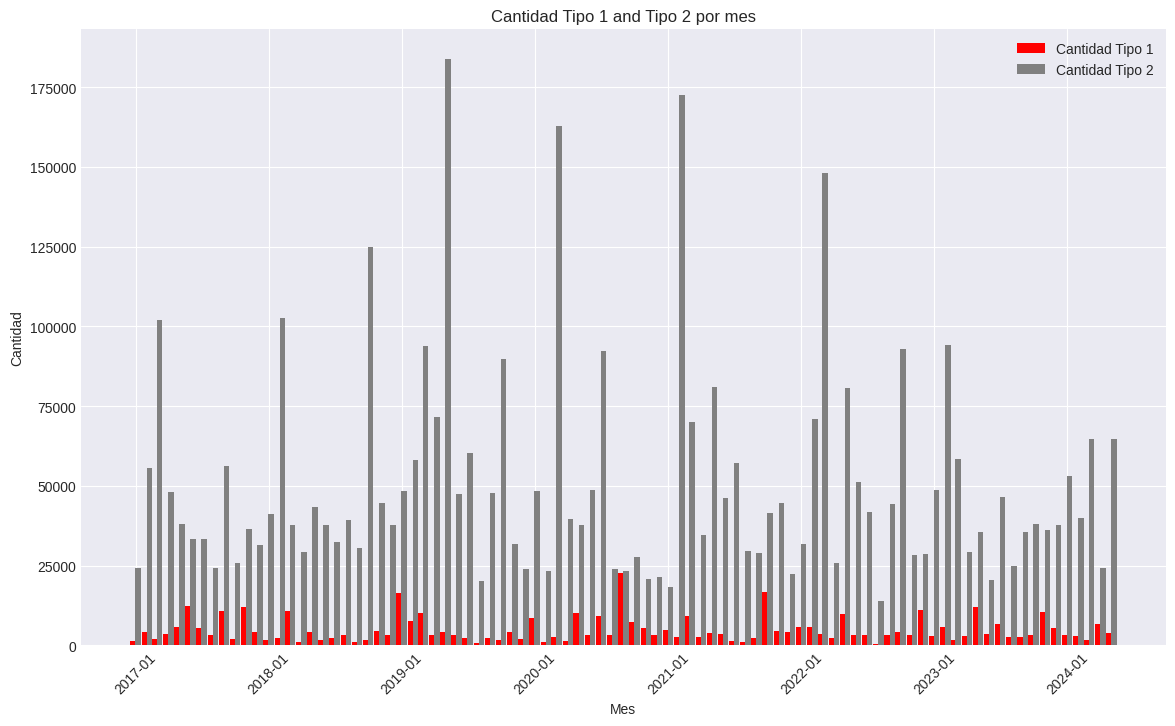

In [649]:
# Group by month and year and calculate the sum for each group
df['month_year'] = df['fecha'].dt.to_period('M')
sums_by_month = df.groupby('month_year').agg({
    'cantidad tipo 1': 'sum',
    'cantidad tipo 2': 'sum'
}).reset_index()

# Convert 'month_year' back to datetime for plotting
sums_by_month['month_year'] = sums_by_month['month_year'].dt.to_timestamp()

# Set up the bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the bars
width = 15  # width of the bars
ax.bar(sums_by_month['month_year'] - pd.DateOffset(days=width//2), sums_by_month['cantidad tipo 1'], width=width, label='Cantidad Tipo 1', align='center', color='red')
ax.bar(sums_by_month['month_year'] + pd.DateOffset(days=width//2), sums_by_month['cantidad tipo 2'], width=width, label='Cantidad Tipo 2', align='center', color='gray')

# Set labels and title
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad Tipo 1 and Tipo 2 por mes')
ax.legend()

# Format the x-axis to show the month and year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



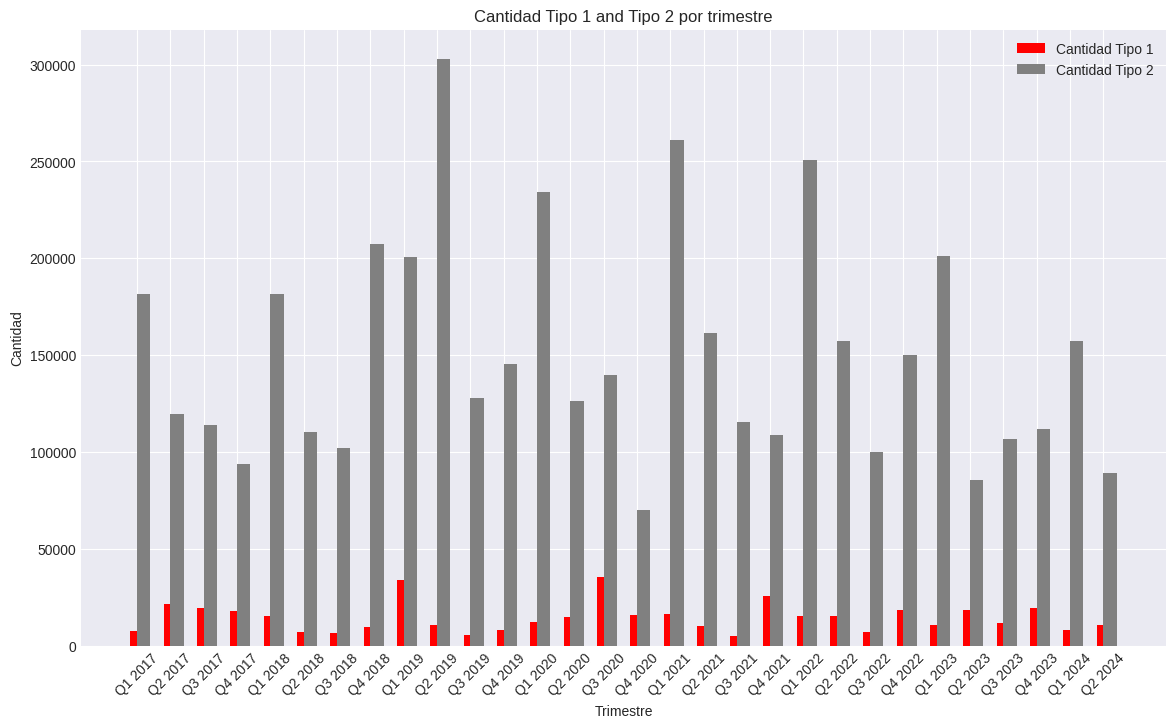

In [650]:
# Group by quarter and year and calculate the sum for each group
df['quarter'] = df['fecha'].dt.to_period('Q')
sums_by_quarter = df.groupby('quarter').agg({
    'cantidad tipo 1': 'sum',
    'cantidad tipo 2': 'sum'
}).reset_index()

# Format quarters as 'Qx 20xx'
sums_by_quarter['quarter'] = sums_by_quarter['quarter'].apply(lambda x: f'Q{x.quarter} {x.year}')

# Set up the bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the bars
ax.bar(sums_by_quarter['quarter'], sums_by_quarter['cantidad tipo 1'], width=0.4, label='Cantidad Tipo 1', align='center', color='red')
ax.bar(sums_by_quarter['quarter'], sums_by_quarter['cantidad tipo 2'], width=0.4, label='Cantidad Tipo 2', align='edge', color='gray')

# Set labels and title
ax.set_xlabel('Trimestre')
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad Tipo 1 and Tipo 2 por trimestre')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



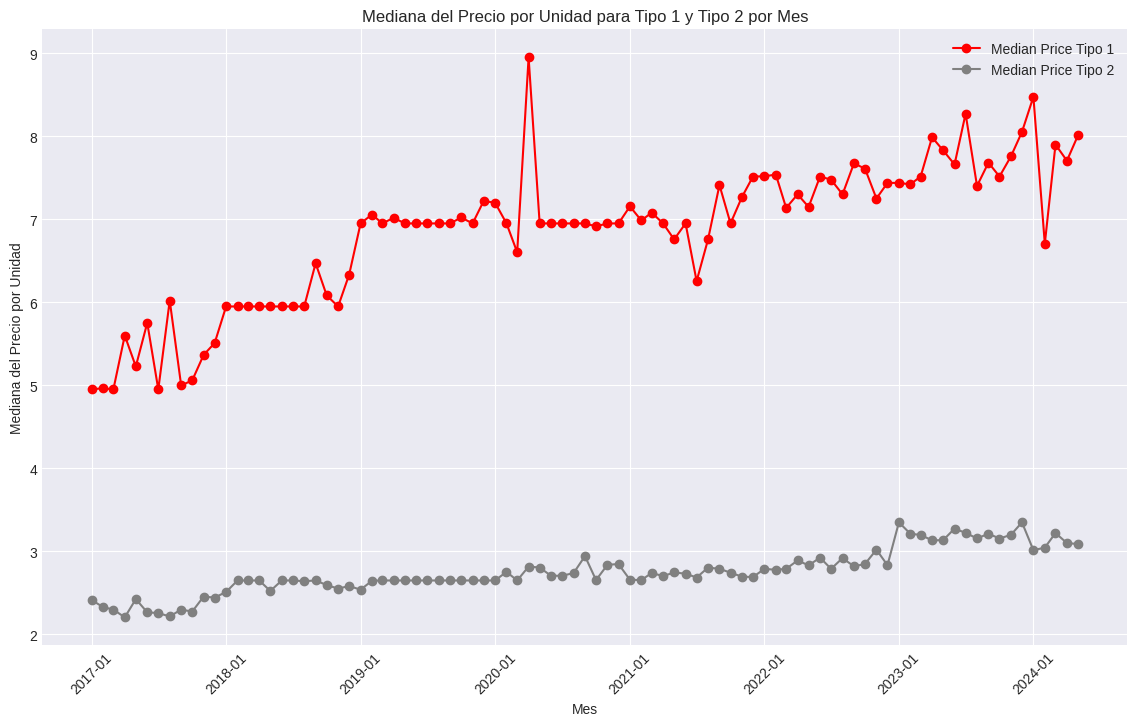

In [651]:
# Ensure the 'fecha' column is in datetime format
df['fecha'] = pd.to_datetime(df['fecha'])

# Calculate price per unit for each type
df['price_per_unit_tipo_1'] = df['precio tipo 1'] / df['cantidad tipo 1']
df['price_per_unit_tipo_2'] = df['precio tipo 2'] / df['cantidad tipo 2']

# Group by month and year and calculate the median price for each type
df['month_year'] = df['fecha'].dt.to_period('M')
median_price_by_month = df.groupby('month_year').agg({
    'price_per_unit_tipo_1': 'median',
    'price_per_unit_tipo_2': 'median'
}).reset_index()

# Convert 'month_year' back to datetime for plotting
median_price_by_month['month_year'] = median_price_by_month['month_year'].dt.to_timestamp()

# Set up the line chart
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the median prices
ax.plot(median_price_by_month['month_year'], median_price_by_month['price_per_unit_tipo_1'], marker='o', label='Median Price Tipo 1', color='red')
ax.plot(median_price_by_month['month_year'], median_price_by_month['price_per_unit_tipo_2'], marker='o', label='Median Price Tipo 2', color='gray')

# Set labels and title
ax.set_xlabel('Mes')
ax.set_ylabel('Mediana del Precio por Unidad')
ax.set_title('Mediana del Precio por Unidad para Tipo 1 y Tipo 2 por Mes')
ax.legend()

# Format the x-axis to show the month and year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



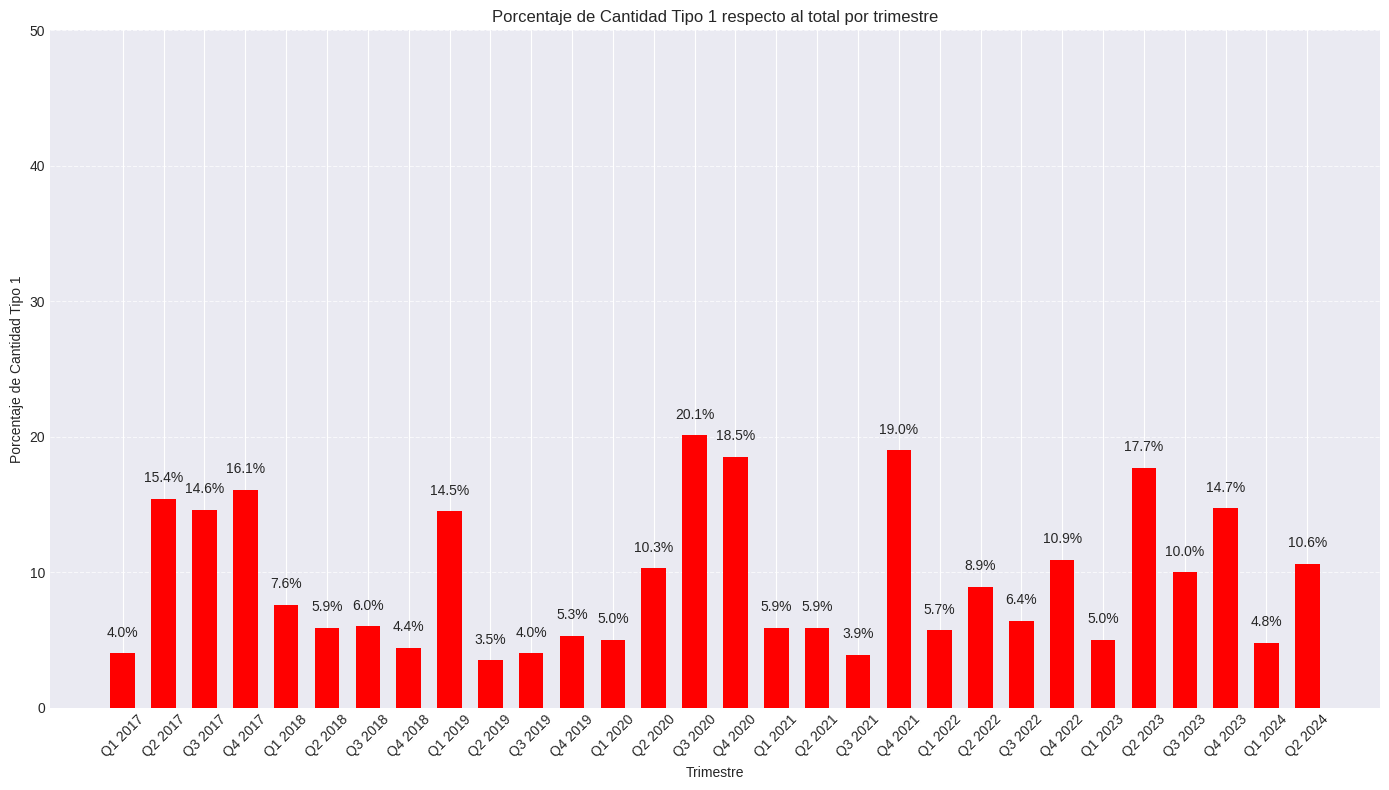

In [652]:
# Group by quarter and year and calculate the sum for each group
df['quarter'] = df['fecha'].dt.to_period('Q')
sums_by_quarter = df.groupby('quarter').agg({
    'cantidad tipo 1': 'sum',
    'cantidad tipo 2': 'sum'
}).reset_index()

# Format quarters as 'Qx 20xx'
sums_by_quarter['quarter'] = sums_by_quarter['quarter'].apply(lambda x: f'Q{x.quarter} {x.year}')

# Calculate the percentage of Cantidad Tipo 1
sums_by_quarter['total'] = sums_by_quarter['cantidad tipo 1'] + sums_by_quarter['cantidad tipo 2']
sums_by_quarter['percentage_tipo_1'] = (sums_by_quarter['cantidad tipo 1'] / sums_by_quarter['total'] * 100).round(1)

# Set up the bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the bars
ax.bar(sums_by_quarter['quarter'], sums_by_quarter['percentage_tipo_1'], width=0.6, color='red')

# Set labels and title
ax.set_xlabel('Trimestre')
ax.set_ylabel('Porcentaje de Cantidad Tipo 1')
ax.set_title('Porcentaje de Cantidad Tipo 1 respecto al total por trimestre')

# Add percentage labels on top of each bar
for i, v in enumerate(sums_by_quarter['percentage_tipo_1']):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set y-axis to display percentages from 0 to 100
ax.set_ylim(0, 50)

# Add grid lines for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [653]:
import pandas as pd
import numpy as np

# Ensure the 'fecha' column is in datetime format
df['fecha'] = pd.to_datetime(df['fecha'])

# Filter the dataset to focus on tipo 1 only and exclude rows with zero quantity
df_tipo_1 = df[(df['cantidad tipo 1'] > 0)][['cliente', 'fecha', 'cantidad tipo 1', 'precio tipo 1']].copy()

# Calculate median order quantity per client
client_median_quantity = df_tipo_1.groupby('cliente')['cantidad tipo 1'].median().reset_index(name='median_order_quantity')

# Calculate median order frequency (median number of days between orders) per client
df_tipo_1 = df_tipo_1.sort_values(by=['cliente', 'fecha'])
df_tipo_1['next_order_date'] = df_tipo_1.groupby('cliente')['fecha'].shift(-1)
df_tipo_1['days_between_orders'] = (df_tipo_1['next_order_date'] - df_tipo_1['fecha']).dt.days
client_median_frequency = df_tipo_1.groupby('cliente')['days_between_orders'].median().reset_index(name='median_days_between_orders')

# Merge the features into a single DataFrame
client_features_median = client_median_quantity.merge(client_median_frequency, on='cliente')

# Replace NaN values in 'median_days_between_orders' with the maximum value to handle clients with a single order
client_features_median['median_days_between_orders'].fillna(client_features_median['median_days_between_orders'].max(), inplace=True)

client_features_median.head(50)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,cliente,median_order_quantity,median_days_between_orders
0,003001,10.0,361.0
1,010001,15.0,226.0
2,011004,2.0,1869.0
3,011005,51.0,93.0
4,012001,66.0,47.0
5,012002,12.0,292.5
6,013002,24.0,334.0
7,013006,108.0,1869.0
8,014001,30.0,1869.0
9,014002,6.0,1869.0


## clustering para tipo 1 con mediana de dias entre pedidos, numero de pedidos, y cantidad mediana por pedido.

Solo para los que tienen mas de 1 pedido

In [654]:
import pandas as pd

# Ensure the 'fecha' column is in datetime format
df['fecha'] = pd.to_datetime(df['fecha'])

# Filter to include only rows with cantidad tipo 1 > 0
df_filtered = df[df['cantidad tipo 1'] > 0].copy()

# Identify clients with more than one order
order_counts = df_filtered['cliente'].value_counts()
clients_with_multiple_orders = order_counts[order_counts > 1].index

# Filter to include only these clients
df_filtered = df_filtered[df_filtered['cliente'].isin(clients_with_multiple_orders)]

# Group by 'fecha' and 'cliente', and sum the relevant columns
df_grouped = df_filtered.groupby(['fecha', 'cliente']).agg({
    'cantidad tipo 1': 'sum',
    'precio tipo 1': 'sum',
    'cantidad tipo 2': 'sum',
    'precio tipo 2': 'sum'
}).reset_index()

# Calculate median order quantity per client
client_median_quantity = df_grouped.groupby('cliente')['cantidad tipo 1'].median().reset_index(name='median_order_quantity')

# Calculate count of rows with cantidad tipo 1 > 0 per client
client_order_count = df_grouped.groupby('cliente').size().reset_index(name='order_count')

# Calculate median order frequency (median number of days between orders) per client
df_grouped = df_grouped.sort_values(by=['cliente', 'fecha'])
df_grouped['next_order_date'] = df_grouped.groupby('cliente')['fecha'].shift(-1)
df_grouped['days_between_orders'] = (df_grouped['next_order_date'] - df_grouped['fecha']).dt.days
client_median_frequency = df_grouped.groupby('cliente')['days_between_orders'].median().reset_index(name='median_days_between_orders')

# Merge the features into a single DataFrame
client_features_median = client_order_count.merge(client_median_quantity, on='cliente')
client_features_median = client_features_median.merge(client_median_frequency, on='cliente')

# Replace NaN values in 'median_days_between_orders' with the maximum value to handle clients with a single order
client_features_median['median_days_between_orders'].fillna(client_features_median['median_days_between_orders'].max(), inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [655]:
from sklearn.preprocessing import StandardScaler

# Select the features for clustering
features_for_clustering = client_features_median[['median_days_between_orders', 'order_count', 'median_order_quantity']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

scaled_features_df = pd.DataFrame(scaled_features, columns=features_for_clustering.columns)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/pyt

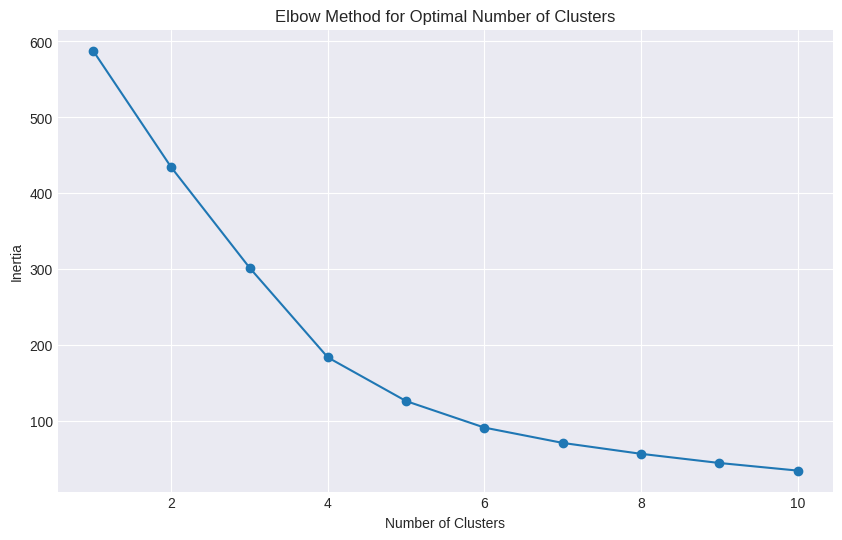

In [656]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [657]:
# Apply K-Means with the chosen number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
client_features_median['cluster'] = kmeans.fit_predict(scaled_features_df)

# Calculate percentage of clients in each cluster
cluster_percentages = (client_features_median['cluster'].value_counts(normalize=True) * 100).round(2)

# Calculate cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=scaled_features_df.columns)

# Inverse transform the cluster centers to get the original scale
cluster_centers_original = scaler.inverse_transform(cluster_centers)
cluster_centers_original_df = pd.DataFrame(cluster_centers_original,
                                           columns=features_for_clustering.columns)

# Create the 3D scatter plot
fig = px.scatter_3d(client_features_median,
                    x='median_days_between_orders',
                    y='order_count',
                    z='median_order_quantity',
                    color='cluster',
                    color_continuous_scale='turbo',
                    title='Client Clusters in 3D',
                    labels={'median_days_between_orders': 'Median Days Between Orders',
                            'order_count': 'Order Count',
                            'median_order_quantity': 'Median Order Quantity'})
fig.write_html("cluster_plot_tipo1.html")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [658]:
# Create a dataframe with cluster information
cluster_info = pd.DataFrame({
    'Cluster': range(4),
    '% of Clients': cluster_percentages.values,
    'Avg Days Between Orders': cluster_centers_original_df['median_days_between_orders'].round(2),
    'Avg Order Count': cluster_centers_original_df['order_count'].round(2),
    'Avg Order Quantity': cluster_centers_original_df['median_order_quantity'].round(2)
})

# Set 'Cluster' as the index
cluster_info.set_index('Cluster', inplace=True)

# Print the table
print(cluster_info)

         % of Clients  Avg Days Between Orders  Avg Order Count  \
Cluster                                                           
0               80.61                   142.39             9.78   
1               11.22                   236.25             2.50   
2                7.14                    22.04            94.93   
3                1.02                   801.50             2.82   

         Avg Order Quantity  
Cluster                      
0                    125.88  
1                   5050.50  
2                     42.43  
3                     89.14  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## clustering para tipo 2 con mediana de dias entre pedidos, numero de pedidos, y cantidad mediana por pedido.

Solo para los que tienen mas de 1 pedido

In [659]:
# Ensure the 'fecha' column is in datetime format
df['fecha'] = pd.to_datetime(df['fecha'])

# Filter to include only rows with cantidad tipo 2 > 0
df_filtered = df[df['cantidad tipo 2'] > 0].copy()

# Identify clients with more than one order
order_counts = df_filtered['cliente'].value_counts()
clients_with_multiple_orders = order_counts[order_counts > 1].index

# Filter to include only these clients
df_filtered = df_filtered[df_filtered['cliente'].isin(clients_with_multiple_orders)]

# Group by 'fecha' and 'cliente', and sum the relevant columns
df_grouped = df_filtered.groupby(['fecha', 'cliente']).agg({
    'cantidad tipo 1': 'sum',
    'precio tipo 1': 'sum',
    'cantidad tipo 2': 'sum',
    'precio tipo 2': 'sum'
}).reset_index()

# Calculate median order quantity per client for tipo 2
client_median_quantity = df_grouped.groupby('cliente')['cantidad tipo 2'].median().reset_index(name='median_order_quantity')

# Calculate count of rows with cantidad tipo 2 > 0 per client
client_order_count = df_grouped.groupby('cliente').size().reset_index(name='order_count')

# Calculate median order frequency (median number of days between orders) per client
df_grouped = df_grouped.sort_values(by=['cliente', 'fecha'])
df_grouped['next_order_date'] = df_grouped.groupby('cliente')['fecha'].shift(-1)
df_grouped['days_between_orders'] = (df_grouped['next_order_date'] - df_grouped['fecha']).dt.days
client_median_frequency = df_grouped.groupby('cliente')['days_between_orders'].median().reset_index(name='median_days_between_orders')

# Merge the features into a single DataFrame
client_features_median = client_order_count.merge(client_median_quantity, on='cliente')
client_features_median = client_features_median.merge(client_median_frequency, on='cliente')

# Replace NaN values in 'median_days_between_orders' with the maximum value to handle clients with a single order
client_features_median['median_days_between_orders'].fillna(client_features_median['median_days_between_orders'].max(), inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [660]:
# Select the features for clustering
features_for_clustering = client_features_median[['median_days_between_orders', 'order_count', 'median_order_quantity']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

scaled_features_df = pd.DataFrame(scaled_features, columns=features_for_clustering.columns)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/pyt

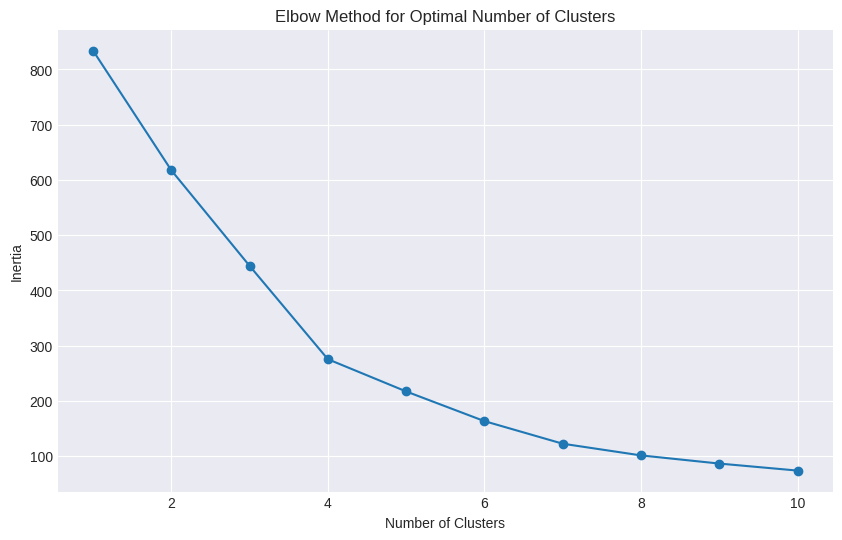

In [661]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [662]:
# Apply K-Means with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=4, random_state=42)
client_features_median['cluster'] = kmeans.fit_predict(scaled_features_df)

# Calculate percentage of clients in each cluster
cluster_percentages = (client_features_median['cluster'].value_counts(normalize=True) * 100).round(2)

# Calculate cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=scaled_features_df.columns)

# Inverse transform the cluster centers to get the original scale
cluster_centers_original = scaler.inverse_transform(cluster_centers)
cluster_centers_original_df = pd.DataFrame(cluster_centers_original,
                                           columns=features_for_clustering.columns)

# Interactive 3D scatter plot using Plotly
import plotly.express as px

fig = px.scatter_3d(client_features_median,
                    x='median_days_between_orders',
                    y='order_count',
                    z='median_order_quantity',
                    color='cluster',
                    color_continuous_scale='turbo',
                    title='Client Clusters in 3D (Tipo 2)',
                    labels={'median_days_between_orders': 'Median Days Between Orders',
                            'order_count': 'Order Count',
                            'median_order_quantity': 'Median Order Quantity'})

fig.write_html("cluster_plot_tipo2.html")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [663]:
# Create a dataframe with cluster information
cluster_info = pd.DataFrame({
    'Cluster': range(4),
    '% of Clients': cluster_percentages.values,
    'Avg Days Between Orders': cluster_centers_original_df['median_days_between_orders'].round(2),
    'Avg Order Count': cluster_centers_original_df['order_count'].round(2),
    'Avg Order Quantity': cluster_centers_original_df['median_order_quantity'].round(2)
})

# Set 'Cluster' as the index
cluster_info.set_index('Cluster', inplace=True)

# Print the table
print(cluster_info)

         % of Clients  Avg Days Between Orders  Avg Order Count  \
Cluster                                                           
0               81.65                   545.89             3.03   
1               13.31                    91.12            17.44   
2                4.68                    13.58           164.23   
3                0.36                    11.00            71.00   

         Avg Order Quantity  
Cluster                      
0                    900.43  
1                    383.32  
2                    344.00  
3                  18900.00  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [664]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,fecha,cliente,cantidad tipo 1,precio tipo 1,cantidad tipo 2,precio tipo 2,month_year,quarter,price_per_unit_tipo_1,price_per_unit_tipo_2
0,2017-01-09,3802,32.0,148.5,475.0,1147.5,2017-01,2017Q1,4.640625,2.415789
1,2017-01-10,9011GB,0.0,0.0,1200.0,2694.3,2017-01,2017Q1,NaN,2.245250
2,2017-01-10,9070DE,120.0,432.0,1212.0,2502.0,2017-01,2017Q1,3.600000,2.064356
3,2017-01-10,9128AU,0.0,0.0,606.0,2310.0,2017-01,2017Q1,NaN,3.811881
4,2017-01-12,050003,0.0,0.0,24.0,60.0,2017-01,2017Q1,NaN,2.500000


#Creación y entrenamiento del modelo

## Transformaciones para el modelo

In [665]:
import pandas as pd

# Ensure the 'fecha' column is in datetime format
df['fecha'] = pd.to_datetime(df['fecha'])

# Select the columns to keep
columns_to_keep = ['fecha', 'cantidad tipo 1', 'cantidad tipo 2']

# Drop all other columns
df_filtered = df[columns_to_keep]

# Display the first few rows of the filtered dataframe
df_filtered.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,fecha,cantidad tipo 1,cantidad tipo 2
0,2017-01-09,32.0,475.0
1,2017-01-10,0.0,1200.0
2,2017-01-10,120.0,1212.0
3,2017-01-10,0.0,606.0
4,2017-01-12,0.0,24.0


In [666]:
# Separate into two DataFrames
dftipo1 = df_filtered[['fecha', 'cantidad tipo 1']]
dftipo2 = df_filtered[['fecha', 'cantidad tipo 2']]

# Display the first few rows of each DataFrame
dftipo2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,fecha,cantidad tipo 2
0,2017-01-09,475.0
1,2017-01-10,1200.0
2,2017-01-10,1212.0
3,2017-01-10,606.0
4,2017-01-12,24.0


In [667]:
## AGRUPAR POR DIAS

# Convert 'fecha' to datetime
dftipo1['fecha'] = pd.to_datetime(dftipo1['fecha'])
dftipo2['fecha'] = pd.to_datetime(dftipo2['fecha'])

# Group by month and sum quantities, then filter out rows with cantidad tipo 1 or tipo 2 as 0
dftipo1grouped = dftipo1.groupby(pd.Grouper(key='fecha', freq='D')).sum().reset_index()
dftipo1grouped = dftipo1grouped[dftipo1grouped['cantidad tipo 1'] > 0]

dftipo2grouped = dftipo2.groupby(pd.Grouper(key='fecha', freq='D')).sum().reset_index()
dftipo2grouped = dftipo2grouped[dftipo2grouped['cantidad tipo 2'] > 0]

# Display the first few rows of each grouped DataFrame
dftipo1grouped.head()
dftipo2grouped.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-667-50667f39168e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-667-50667f39168e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,fecha,cantidad tipo 2
0,2017-01-09,475.0
1,2017-01-10,3018.0
3,2017-01-12,24.0
4,2017-01-13,4812.0
7,2017-01-16,1080.0


In [668]:
dftipo1grouped.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,fecha,cantidad tipo 1
0,2017-01-09,32.0
1,2017-01-10,120.0
4,2017-01-13,108.0
7,2017-01-16,48.0
11,2017-01-20,684.0


In [669]:
dftipo2 = dftipo2grouped
dftipo1 = dftipo1grouped

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [670]:
dftipo1alt = dftipo1.copy()
dftipo1alt['cantidad tipo 1'] = dftipo1alt['cantidad tipo 1'].apply(lambda x: 0 if x > 2500 else x)

dftipo2alt = dftipo2.copy()
dftipo2alt['cantidad tipo 2'] = dftipo2alt['cantidad tipo 2'].apply(lambda x: 0 if x > 5000 else x)

In [671]:
dftipo1['fecha'] = pd.to_datetime(dftipo1['fecha'], format='%d/%m/%y')
dftipo1 = dftipo1.set_index('fecha')
dftipo1 = dftipo1.asfreq('1d')
dftipo1 = dftipo1.sort_index()
dftipo1.head(10)
dftipo1['cantidad tipo 1'].fillna(0, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [672]:
dftipo2['fecha'] = pd.to_datetime(dftipo2['fecha'], format='%d/%m/%y')
dftipo2 = dftipo2.set_index('fecha')
dftipo2 = dftipo2.asfreq('1d')
dftipo2 = dftipo2.sort_index()
dftipo2.head(10)
dftipo2['cantidad tipo 2'].fillna(0, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [673]:
fin_train = '2022-06-01 00:00:00'
fin_validacion = '2023-09-30 23:59:00'
datos_train2 = dftipo2.loc[: fin_train, :]
datos_val2   = dftipo2.loc[fin_train:fin_validacion, :]
datos_test2  = dftipo2.loc[fin_validacion:, :]
print(f"Fechas train      : {datos_train2.index.min()} --- {datos_train2.index.max()}  (n={len(datos_train2)})")
print(f"Fechas validación : {datos_val2.index.min()} --- {datos_val2.index.max()}  (n={len(datos_val2)})")
print(f"Fechas test       : {datos_test2.index.min()} --- {datos_test2.index.max()}  (n={len(datos_test2)})")

Fechas train      : 2017-01-09 00:00:00 --- 2022-06-01 00:00:00  (n=1970)
Fechas validación : 2022-06-01 00:00:00 --- 2023-09-30 00:00:00  (n=487)
Fechas test       : 2023-10-01 00:00:00 --- 2024-05-17 00:00:00  (n=230)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



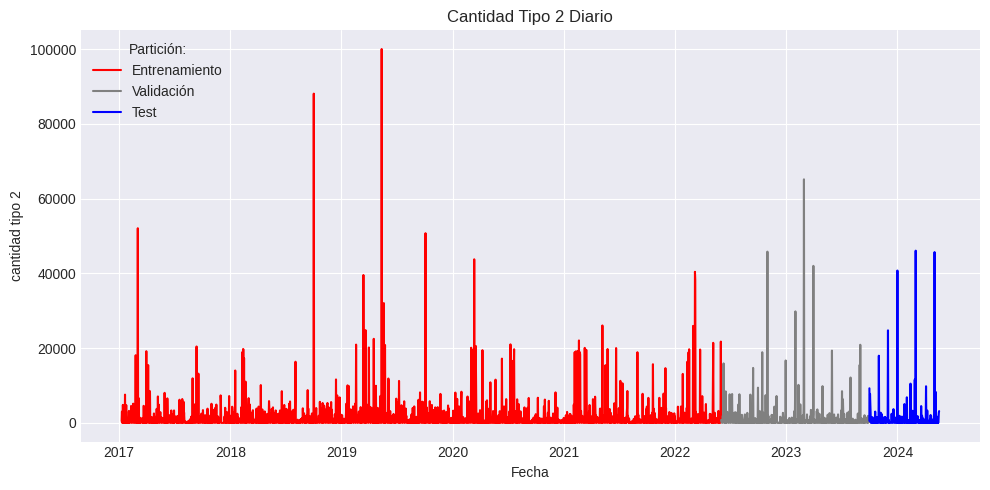

In [674]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(datos_train2.index, datos_train2['cantidad tipo 2'], label='Entrenamiento', color ='red')
plt.plot(datos_val2.index, datos_val2['cantidad tipo 2'], label='Validación', color='gray')
plt.plot(datos_test2.index, datos_test2['cantidad tipo 2'], label='Test', color='blue')

plt.title('Cantidad Tipo 2 Diario')
plt.xlabel('Fecha')
plt.ylabel('cantidad tipo 2')
plt.legend(title='Partición:', loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

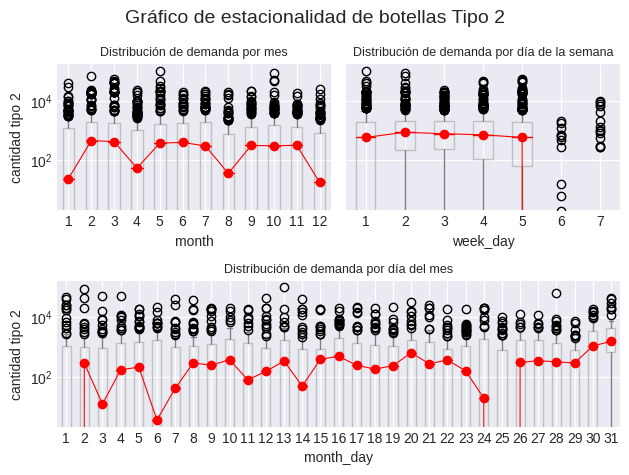

In [675]:
import matplotlib.pyplot as plt

fig, axs = plt.subplot_mosaic(
    """
    AB
    CC
    """,
    sharey=True
)

# Users distribution by month
dftipo2['month'] = dftipo2.index.month
dftipo2.boxplot(column='cantidad tipo 2', by='month', ax=axs['A'], color={'boxes': 'silver', 'whiskers': 'gray', 'medians': 'red', 'caps': 'gray'})
dftipo2.groupby('month')['cantidad tipo 2'].median().plot(style='ro-', linewidth=0.8, ax=axs['A'])
axs['A'].set_ylabel('cantidad tipo 2')
axs['A'].set_title('Distribución de demanda por mes', fontsize=9)
axs['A'].set_yscale('log')  # Set y-axis to log scale

# Users distribution by week day
dftipo2['week_day'] = dftipo2.index.day_of_week + 1
dftipo2.boxplot(column='cantidad tipo 2', by='week_day', ax=axs['B'], color={'boxes': 'silver', 'whiskers': 'gray', 'medians': 'red', 'caps': 'gray'})
dftipo2.groupby('week_day')['cantidad tipo 2'].median().plot(style='ro-', linewidth=0.8, ax=axs['B'])
axs['B'].set_ylabel('cantidad tipo 2')
axs['B'].set_title('Distribución de demanda por día de la semana', fontsize=9)
axs['B'].set_yscale('log')  # Set y-axis to log scale

# Users distribution by month day
dftipo2['month_day'] = dftipo2.index.day
dftipo2.boxplot(column='cantidad tipo 2', by='month_day', ax=axs['C'], color={'boxes': 'silver', 'whiskers': 'gray', 'medians': 'red', 'caps': 'gray'})
dftipo2.groupby('month_day')['cantidad tipo 2'].median().plot(style='ro-', linewidth=0.8, ax=axs['C'])
axs['C'].set_ylabel('cantidad tipo 2')
axs['C'].set_title('Distribución de demanda por día del mes', fontsize=9)
axs['C'].set_yscale('log')  # Set y-axis to log scale

fig.suptitle("Gráfico de estacionalidad de botellas Tipo 2", fontsize=14)
fig.tight_layout()
plt.show()


In [676]:
!pip install skforecast

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [677]:
import skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterBaseline import ForecasterEquivalentDate
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

In [678]:
dftipo2.head(10)

,cantidad tipo 2,month,week_day,month_day
fecha,,,,
2017-01-09,475.0,1,1,9
2017-01-10,3018.0,1,2,10
2017-01-11,0.0,1,3,11
2017-01-12,24.0,1,4,12
2017-01-13,4812.0,1,5,13
2017-01-14,0.0,1,6,14
2017-01-15,0.0,1,7,15
2017-01-16,1080.0,1,1,16
2017-01-17,0.0,1,2,17


## Creacion Baseline

In [679]:
dftipo1 = dftipo1.asfreq('D')
forecaster = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(days=1),
                 n_offsets = 1
             )

# Entrenar forecaster
# ==============================================================================
forecaster.fit(y=dftipo1.loc[:fin_validacion, 'cantidad tipo 1'])
forecaster

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



ForecasterEquivalentDate 
Offset: <DateOffset: days=1> 
Number of offsets: 1 
Aggregation function: mean 
Window size: 1 
Training range: [Timestamp('2017-01-09 00:00:00'), Timestamp('2023-09-30 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Creation date: 2024-06-28 17:09:44 
Last fit date: 2024-06-28 17:09:44 
Skforecast version: 0.12.1 
Python version: 3.10.12 
Forecaster id: None 

In [680]:
# Backtesting
metrica_baseline, predicciones = backtesting_forecaster(
    forecaster         = forecaster,
    y                  = dftipo1['cantidad tipo 1'],
    steps              = 7,
    metric             = 'mean_squared_error',
    initial_train_size = len(dftipo1.loc[:fin_validacion]),
    refit              = False,
    n_jobs             = 'auto',
    verbose            = False,
    show_progress      = True
)

print(f"Backtest error (MSE): {metrica_baseline}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/33 [00:00<?, ?it/s]

Backtest error (MSE): 354239.9130434783


In [681]:
dftipo2 = dftipo2.asfreq('D')
forecaster = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(days=1),
                 n_offsets = 1
             )

# Entrenar forecaster
# ==============================================================================
forecaster.fit(y=dftipo2.loc[:fin_validacion, 'cantidad tipo 2'])
forecaster

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



ForecasterEquivalentDate 
Offset: <DateOffset: days=1> 
Number of offsets: 1 
Aggregation function: mean 
Window size: 1 
Training range: [Timestamp('2017-01-09 00:00:00'), Timestamp('2023-09-30 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Creation date: 2024-06-28 17:09:45 
Last fit date: 2024-06-28 17:09:45 
Skforecast version: 0.12.1 
Python version: 3.10.12 
Forecaster id: None 

In [682]:
# Backtesting
metrica_baseline, predicciones = backtesting_forecaster(
    forecaster         = forecaster,
    y                  = dftipo2['cantidad tipo 2'],
    steps              = 7,
    metric             = 'mean_squared_error',
    initial_train_size = len(dftipo2.loc[:fin_validacion]),
    refit              = False,
    n_jobs             = 'auto',
    verbose            = False,
    show_progress      = True
)

print(f"Backtest error (MSE): {metrica_baseline}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/33 [00:00<?, ?it/s]

Backtest error (MSE): 33218560.9


## Modelo Cantidad Tipo 2 (con y sin exogenas)

In [683]:
# Crear forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                 regressor     = Ridge(random_state=123),
                 lags          = 14,
                 transformer_y = StandardScaler(),
                 forecaster_id = 'cantidad tipo 2'
             )
forecaster

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



ForecasterAutoreg 
Regressor: Ridge(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14] 
Transformer for y: StandardScaler() 
Transformer for exog: None 
Window size: 14 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': 123, 'solver': 'auto', 'tol': 0.0001} 
fit_kwargs: {} 
Creation date: 2024-06-28 17:09:46 
Last fit date: None 
Skforecast version: 0.12.1 
Python version: 3.10.12 
Forecaster id: cantidad tipo 2 

In [684]:
# Grid search de hiperparámetros
# ==============================================================================
# Hiperparámetros del regresor
param_grid = {'alpha': np.logspace(-3, 3, 10)}

# Lags utilizados como predictores
lags_grid = [7, 14, 21, [7, 14, 21]]

resultados_grid = grid_search_forecaster(
                      forecaster         = forecaster,
                      y                  = dftipo2.loc[:fin_validacion, 'cantidad tipo 2'],
                      param_grid         = param_grid,
                      lags_grid          = lags_grid,
                      steps              = 7,
                      metric             = 'mean_squared_error',
                      refit              = False,
                      initial_train_size = len(datos_train2),
                      fixed_train_size   = False,
                      return_best        = True,
                      verbose            = False
                  )

best_params = resultados_grid['params'].iat[0]
resultados_grid.head()

Number of models compared: 40.


lags grid:   0%|          | 0/4 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 7 14 21] 
  Parameters: {'alpha': 1000.0}
  Backtesting metric: 24713405.912347145



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.



,lags,lags_label,params,mean_squared_error,alpha
39,"[7, 14, 21]","[7, 14, 21]",{'alpha': 1000.0},2.471341e+07,1000.000000
19,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]",{'alpha': 1000.0},2.476321e+07,1000.000000
9,"[1, 2, 3, 4, 5, 6, 7]","[1, 2, 3, 4, 5, 6, 7]",{'alpha': 1000.0},2.477128e+07,1000.000000
29,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'alpha': 1000.0},2.490394e+07,1000.000000
38,"[7, 14, 21]","[7, 14, 21]",{'alpha': 215.44346900318823},2.505718e+07,215.443469


In [685]:
# Backtest modelo final (conjunto de test)
# ==============================================================================
metrica, predicciones = backtesting_forecaster(
                            forecaster         = forecaster,
                            y                  = dftipo2['cantidad tipo 2'],
                            initial_train_size = len(dftipo2.loc[:fin_validacion, :]),
                            steps              = 7,
                            refit              = True,
                            fixed_train_size   = False,
                            metric             = 'mean_squared_error',
                            verbose            = True,
                            show_progress      = True
                        )
print(f'Error backtest: {metrica}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Information of backtesting process
----------------------------------
Number of observations used for initial training: 2456
Number of observations used for backtesting: 230
    Number of folds: 33
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0
    Last fold only includes 6 observations.

Fold: 0
    Training:   2017-01-09 00:00:00 -- 2023-09-30 00:00:00  (n=2456)
    Validation: 2023-10-01 00:00:00 -- 2023-10-07 00:00:00  (n=7)
Fold: 1
    Training:   2017-01-09 00:00:00 -- 2023-10-07 00:00:00  (n=2463)
    Validation: 2023-10-08 00:00:00 -- 2023-10-14 00:00:00  (n=7)
Fold: 2
    Training:   2017-01-09 00:00:00 -- 2023-10-14 00:00:00  (n=2470)
    Validation: 2023-10-15 00:00:00 -- 2023-10-21 00:00:00  (n=7)
Fold: 3
    Training:   2017-01-09 00:00:00 -- 2023-10-21 00:00:00  (n=2477)
    Validation: 2023-10-22 00:00:00 -- 2023-10-28 00:00:00  (n=7)
Fold: 4
    Training:   2017-01-09 00:00:00 -- 2023-10-28 00:00:00  (n

  0%|          | 0/33 [00:00<?, ?it/s]

Error backtest: 31249415.7842367


In [686]:
dftipo2['month']     = dftipo2.index.month
dftipo2['month_day'] = dftipo2.index.day
dftipo2['week_day']  = dftipo2.index.day_of_week
dftipo2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,cantidad tipo 2,month,week_day,month_day
fecha,,,,
2017-01-09,475.0,1,0,9
2017-01-10,3018.0,1,1,10
2017-01-11,0.0,1,2,11
2017-01-12,24.0,1,3,12
2017-01-13,4812.0,1,4,13


### Cantidad Tipo 2 con exogenas

In [687]:
one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse_output=False, drop='if_binary'),
        ['month', 'week_day', 'month_day'],
    ),
    remainder="passthrough",
    verbose_feature_names_out=False,
).set_output(transform="pandas")

dftipo2 = one_hot_encoder.fit_transform(dftipo2)
dftipo2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,...,month_day_23,month_day_24,month_day_25,month_day_26,month_day_27,month_day_28,month_day_29,month_day_30,month_day_31,cantidad tipo 2
fecha,,,,,,,,,,,,,,,,,,,,,
2017-01-09,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,475.0
2017-01-10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3018.0
2017-01-11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
2017-01-13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4812.0


In [688]:
datos_train2 = dftipo2.loc[: fin_train, :]
datos_val2   = dftipo2.loc[fin_train:fin_validacion, :]
datos_test2  = dftipo2.loc[fin_validacion:, :]
exog_features = [col for col in dftipo2.columns if col.startswith(('month_', 'week_day_', 'month_day_'))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [689]:
# Crear y entrenar forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                 regressor     = Ridge(**best_params, random_state=123),
                 lags          = 14,
                 transformer_y = StandardScaler(),
                 forecaster_id = 'cantidad_tipo_2'
             )

# Backtest modelo con variables exógenas
# ==============================================================================
metrica, predicciones = backtesting_forecaster(
                            forecaster         = forecaster,
                            y                  = dftipo2['cantidad tipo 2'],
                            exog               = dftipo2[exog_features],
                            initial_train_size = len(dftipo2.loc[:fin_validacion, :]),
                            steps              = 7,
                            metric             = 'mean_squared_error',
                            refit              = False,
                            fixed_train_size   = False,
                            verbose            = False,
                            show_progress      = True
                        )

print(f'Error backtest: {metrica}')
predicciones.head(5)

  0%|          | 0/33 [00:00<?, ?it/s]

Error backtest: 30783233.907164242


,pred
2023-10-01,1172.033878
2023-10-02,1862.895244
2023-10-03,1947.913956
2023-10-04,1837.042828
2023-10-05,1784.134376


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



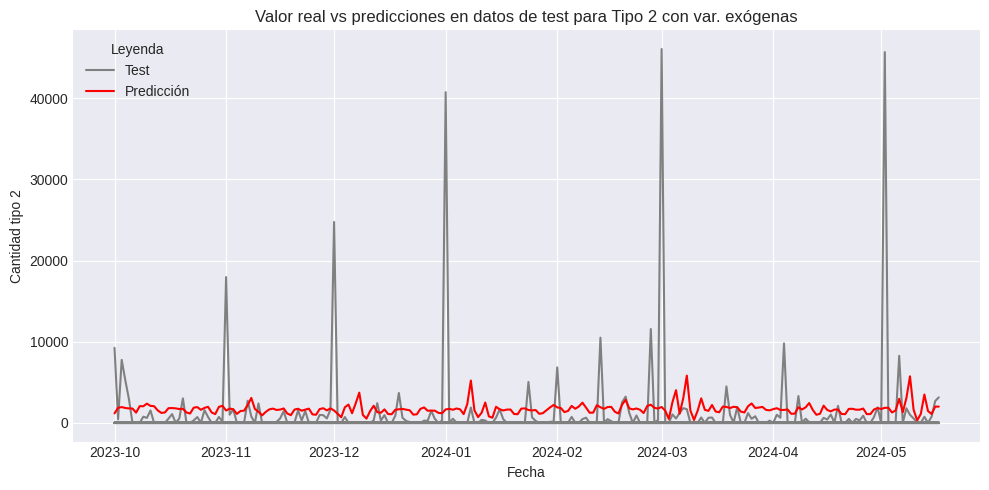

In [690]:
# Plot using matplotlib
plt.figure(figsize=(10, 5))

plt.plot(datos_test2.index, datos_test2, label='Test', color='gray')
plt.plot(predicciones.index, predicciones['pred'], label='Predicción', color='red')

plt.title('Valor real vs predicciones en datos de test para Tipo 2 con var. exógenas')
plt.xlabel('Fecha')
plt.ylabel('Cantidad tipo 2')

# Use only one legend entry for each line
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', title='Leyenda')

plt.tight_layout()
plt.show()

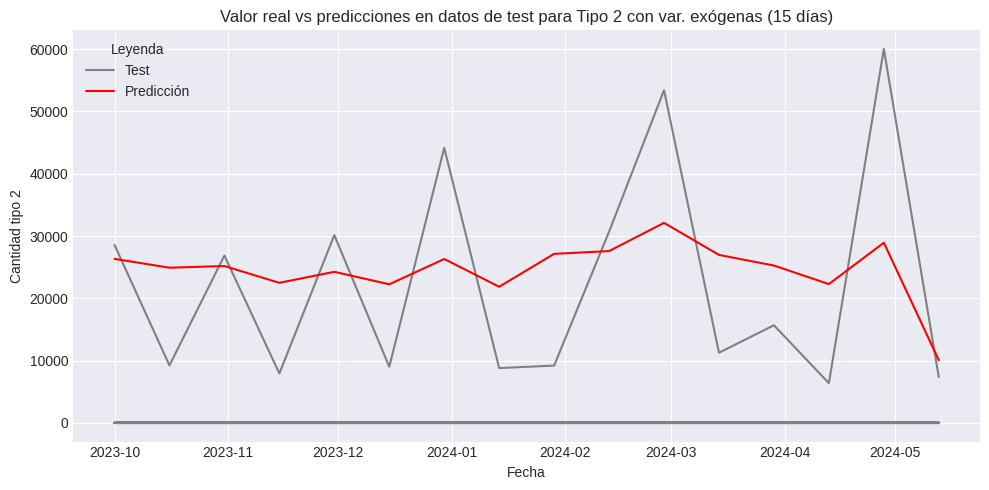

In [691]:
# Group by month and sum (if your data has daily frequency, use .resample('M').sum())
datos_test2_monthly = datos_test2.resample('15D').sum()
predicciones_monthly = predicciones.resample('15D').sum()

# Plot using matplotlib
plt.figure(figsize=(10, 5))

plt.plot(datos_test2_monthly.index, datos_test2_monthly, label='Test', color='gray')
plt.plot(predicciones_monthly.index, predicciones_monthly['pred'], label='Predicción', color='red')

plt.title('Valor real vs predicciones en datos de test para Tipo 2 con var. exógenas (15 días)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad tipo 2')
# Use only one legend entry for each line
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', title='Leyenda')


plt.tight_layout()
plt.show()

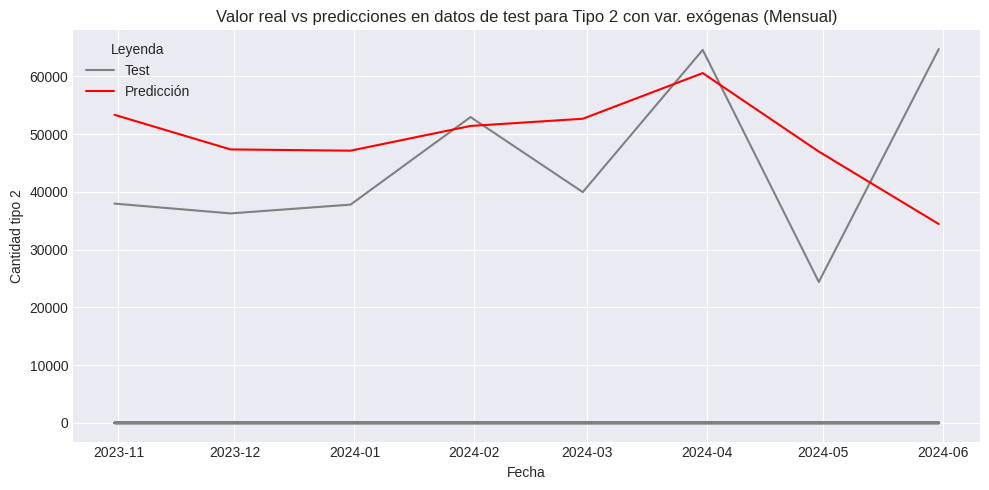

In [692]:
# Group by month and sum (if your data has daily frequency, use .resample('M').sum())
datos_test2_monthly = datos_test2.resample('M').sum()
predicciones_monthly = predicciones.resample('M').sum()

# Plot using matplotlib
plt.figure(figsize=(10, 5))

plt.plot(datos_test2_monthly.index, datos_test2_monthly, label='Test', color='gray')
plt.plot(predicciones_monthly.index, predicciones_monthly['pred'], label='Predicción', color='red')

plt.title('Valor real vs predicciones en datos de test para Tipo 2 con var. exógenas (Mensual)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad tipo 2')
# Use only one legend entry for each line
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', title='Leyenda')

plt.tight_layout()
plt.show()

## Modelo Cantidad Tipo 1 (con y sin exogenas)

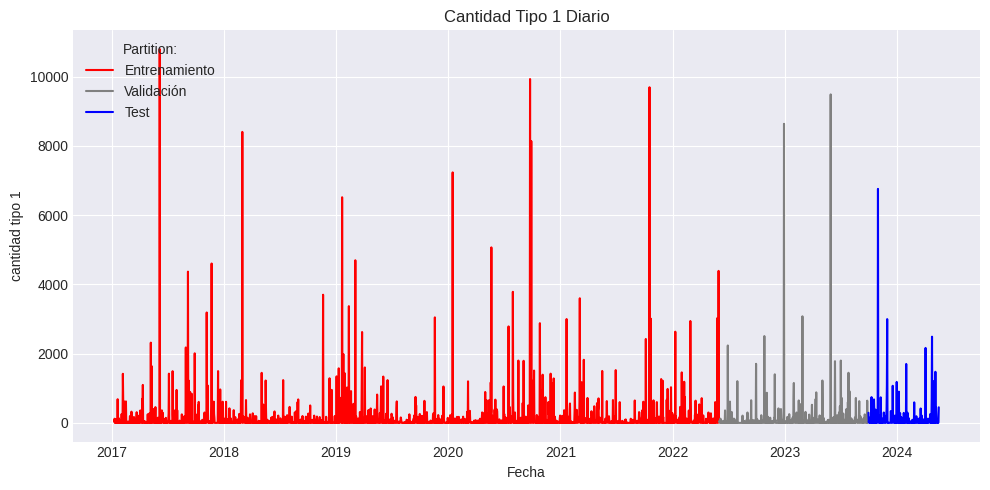

In [693]:
datos_train1 = dftipo1.loc[: fin_train, :]
datos_val1   = dftipo1.loc[fin_train:fin_validacion, :]
datos_test1  = dftipo1.loc[fin_validacion:, :]

plt.figure(figsize=(10, 5))

plt.plot(datos_train1.index, datos_train1['cantidad tipo 1'], label='Entrenamiento', color="red" )
plt.plot(datos_val1.index, datos_val1['cantidad tipo 1'], label='Validación', color="gray")
plt.plot(datos_test1.index, datos_test1['cantidad tipo 1'], label='Test', color="blue")

plt.title('Cantidad Tipo 1 Diario')
plt.xlabel('Fecha')
plt.ylabel('cantidad tipo 1')
plt.legend(title='Partition:', loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

In [694]:
dftipo1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2686 entries, 2017-01-09 to 2024-05-17
Freq: D
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cantidad tipo 1  2686 non-null   float64
dtypes: float64(1)
memory usage: 106.5 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



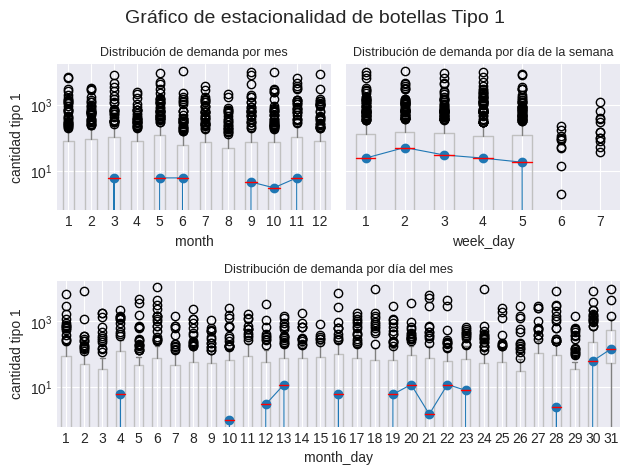

In [695]:
'''fig, axs = plt.subplot_mosaic(
    """
    AB
    CC
    """,
    sharey=True
)

# Users distribution by month
dftipo1['month'] = dftipo1.index.month
dftipo1.boxplot(column='cantidad tipo 1', by='month', ax=axs['A'], color={'boxes': 'silver', 'whiskers': 'gray', 'medians': 'red', 'caps': 'gray'})
dftipo1.groupby('month')['cantidad tipo 1'].median().plot(style='o-', linewidth=0.8, ax=axs['A'])
axs['A'].set_ylabel('cantidad tipo 1')
axs['A'].set_title('Distribución de visitas por mes', fontsize=9)
axs['A'].set_yscale('log')  # Set y-axis to log scale

# Users distribution by week day
dftipo1['week_day'] = dftipo1.index.day_of_week + 1
dftipo1.boxplot(column='cantidad tipo 1', by='week_day', ax=axs['B'],color={'boxes': 'silver', 'whiskers': 'gray', 'medians': 'red', 'caps': 'gray'})
dftipo1.groupby('week_day')['cantidad tipo 1'].median().plot(style='o-', linewidth=0.8, ax=axs['B'])
axs['B'].set_ylabel('cantidad tipo 1')
axs['B'].set_title('Distribución de visitas por día de la semana', fontsize=9)
axs['B'].set_yscale('log')  # Set y-axis to log scale

# Users distribution by month day
dftipo1['month_day'] = dftipo1.index.day
dftipo1.boxplot(column='cantidad tipo 1', by='month_day', ax=axs['C'],color={'boxes': 'silver', 'whiskers': 'gray', 'medians': 'red', 'caps': 'gray'})
dftipo1.groupby('month_day')['cantidad tipo 1'].median().plot(style='o-', linewidth=0.8, ax=axs['C'])
axs['C'].set_ylabel('cantidad tipo 1')
axs['C'].set_title('Distribución de visitas por día del mes', fontsize=9)
axs['C'].set_yscale('log')  # Set y-axis to log scale

fig.suptitle("Gráfico de estacionalidad", fontsize=14)
fig.tight_layout()
plt.show()'''

import matplotlib.pyplot as plt

fig, axs = plt.subplot_mosaic(
    """
    AB
    CC
    """,
    sharey=True
)

# Users distribution by month
dftipo1['month'] = dftipo1.index.month
dftipo1.boxplot(
    column='cantidad tipo 1',
    by='month',
    ax=axs['A'],
    boxprops=dict(color='silver'),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray'),
    medianprops=dict(color='red')
)
dftipo1.groupby('month')['cantidad tipo 1'].median().plot(style='o-', linewidth=0.8, ax=axs['A'])
axs['A'].set_ylabel('cantidad tipo 1')
axs['A'].set_title('Distribución de demanda por mes', fontsize=9)
axs['A'].set_yscale('log')  # Set y-axis to log scale

# Users distribution by week day
dftipo1['week_day'] = dftipo1.index.day_of_week + 1
dftipo1.boxplot(
    column='cantidad tipo 1',
    by='week_day',
    ax=axs['B'],
    boxprops=dict(color='silver'),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray'),
    medianprops=dict(color='red')
)
dftipo1.groupby('week_day')['cantidad tipo 1'].median().plot(style='o-', linewidth=0.8, ax=axs['B'])
axs['B'].set_ylabel('cantidad tipo 1')
axs['B'].set_title('Distribución de demanda por día de la semana', fontsize=9)
axs['B'].set_yscale('log')  # Set y-axis to log scale

# Users distribution by month day
dftipo1['month_day'] = dftipo1.index.day
dftipo1.boxplot(
    column='cantidad tipo 1',
    by='month_day',
    ax=axs['C'],
    boxprops=dict(color='silver'),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray'),
    medianprops=dict(color='red')
)
dftipo1.groupby('month_day')['cantidad tipo 1'].median().plot(style='o-', linewidth=0.8, ax=axs['C'])
axs['C'].set_ylabel('cantidad tipo 1')
axs['C'].set_title('Distribución de demanda por día del mes', fontsize=9)
axs['C'].set_yscale('log')  # Set y-axis to log scale

fig.suptitle("Gráfico de estacionalidad de botellas Tipo 1", fontsize=14)
fig.tight_layout()
plt.show()


In [696]:
dftipo1 = dftipo1.asfreq('D')
forecaster = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(days=1),
                 n_offsets = 1
             )

# Entrenar forecaster
# ==============================================================================
forecaster.fit(y=dftipo1.loc[:fin_validacion, 'cantidad tipo 1'])

metrica_baseline, predicciones = backtesting_forecaster(
    forecaster         = forecaster,
    y                  = dftipo1['cantidad tipo 1'],
    steps              = 7,
    metric             = 'mean_squared_error',
    initial_train_size = len(dftipo1.loc[:fin_validacion]),
    refit              = False,
    n_jobs             = 'auto',
    verbose            = False,
    show_progress      = True
)

print(f"Backtest error (MAE): {metrica_baseline}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/33 [00:00<?, ?it/s]

Backtest error (MAE): 354239.9130434783


In [697]:
# Crear forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                 regressor     = Ridge(random_state=123),
                 lags          = 14,
                 transformer_y = StandardScaler(),
                 forecaster_id = 'cantidad tipo 1'
             )

# Hiperparámetros del regresor
param_grid = {'alpha': np.logspace(-3, 3, 10)}

# Lags utilizados como predictores
lags_grid = [7, 14, 21, [7, 14, 21]]

resultados_grid = grid_search_forecaster(
                      forecaster         = forecaster,
                      y                  = dftipo1.loc[:fin_validacion, 'cantidad tipo 1'],
                      param_grid         = param_grid,
                      lags_grid          = lags_grid,
                      steps              = 7,
                      metric             = 'mean_squared_error',
                      refit              = False,
                      initial_train_size = len(datos_train1),
                      fixed_train_size   = False,
                      return_best        = True,
                      verbose            = False
                  )

best_params = resultados_grid['params'].iat[0]

metrica, predicciones = backtesting_forecaster(
                            forecaster         = forecaster,
                            y                  = dftipo1['cantidad tipo 1'],
                            initial_train_size = len(dftipo1.loc[:fin_validacion, :]),
                            steps              = 7,
                            refit              = True,
                            fixed_train_size   = False,
                            metric             = 'mean_squared_error',
                            verbose            = True,
                            show_progress      = True
                        )
print(f'Error backtest: {metrica}')

Number of models compared: 40.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/4 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 7 14 21] 
  Parameters: {'alpha': 1000.0}
  Backtesting metric: 425383.83029589325

Information of backtesting process
----------------------------------
Number of observations used for initial training: 2456
Number of observations used for backtesting: 230
    Number of folds: 33
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0
    Last fold only includes 6 observations.

Fold: 0
    Training:   2017-01-09 00:00:00 -- 2023-09-30 00:00:00  (n=2456)
    Validation: 2023-10-01 00:00:00 -- 2023-10-07 00:00:00  (n=7)
Fold: 1
    Training:   2017-01-09 00:00:00 -- 2023-10-07 00:00:00  (n=2463)
    Validation: 2023-10-08 00:00:00 -- 2023-10-14 00:00:00  (n=7)
Fold: 2
    Training:   2017-01-09 00:00:00 -- 2023-10-14 00:00:00  (n=2470)
    Validation: 2023-10-15 00:00:00 -- 2023-10-21 00:00:00  (n=7)
Fold: 3
    Training:   2017-0

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.



  0%|          | 0/33 [00:00<?, ?it/s]

Error backtest: 325428.14706365624


### Cantidad tipo 1 con exogenas

In [698]:
dftipo1['month']     = dftipo1.index.month
dftipo1['month_day'] = dftipo1.index.day
dftipo1['week_day']  = dftipo1.index.day_of_week

one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse_output=False, drop='if_binary'),
        ['month', 'week_day', 'month_day'],
    ),
    remainder="passthrough",
    verbose_feature_names_out=False,
).set_output(transform="pandas")

dftipo1 = one_hot_encoder.fit_transform(dftipo1)

datos_train1 = dftipo1.loc[: fin_train, :]
datos_val1   = dftipo1.loc[fin_train:fin_validacion, :]
datos_test1  = dftipo1.loc[fin_validacion:, :]
exog_features = [col for col in dftipo1.columns if col.startswith(('month_', 'week_day_', 'month_day_'))]

forecaster = ForecasterAutoreg(
                 regressor     = Ridge(**best_params, random_state=123),
                 lags          = 14,
                 transformer_y = StandardScaler(),
                 forecaster_id = 'cantidad_tipo_1'
             )

# Backtest modelo con variables exógenas
# ==============================================================================
metrica, predicciones = backtesting_forecaster(
                            forecaster         = forecaster,
                            y                  = dftipo1['cantidad tipo 1'],
                            exog               = dftipo1[exog_features],
                            initial_train_size = len(dftipo1.loc[:fin_validacion, :]),
                            steps              = 7,
                            metric             = 'mean_squared_error',
                            refit              = False,
                            fixed_train_size   = False,
                            verbose            = False,
                            show_progress      = True
                        )

print(f'Error backtest: {metrica}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/33 [00:00<?, ?it/s]

Error backtest: 325864.7725273972


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



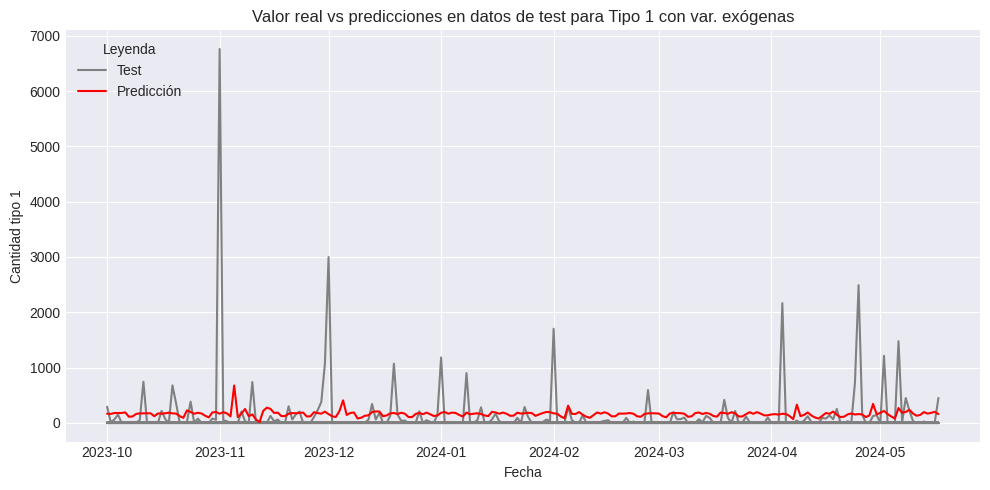

In [699]:
plt.figure(figsize=(10, 5))

plt.plot(datos_test1.index, datos_test1, label='Test', color='gray')
plt.plot(predicciones.index, predicciones['pred'], label='Predicción', color='red')

plt.title('Valor real vs predicciones en datos de test para Tipo 1 con var. exógenas')
plt.xlabel('Fecha')
plt.ylabel('Cantidad tipo 1')
# Use only one legend entry for each line
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', title='Leyenda')

plt.tight_layout()
plt.show()

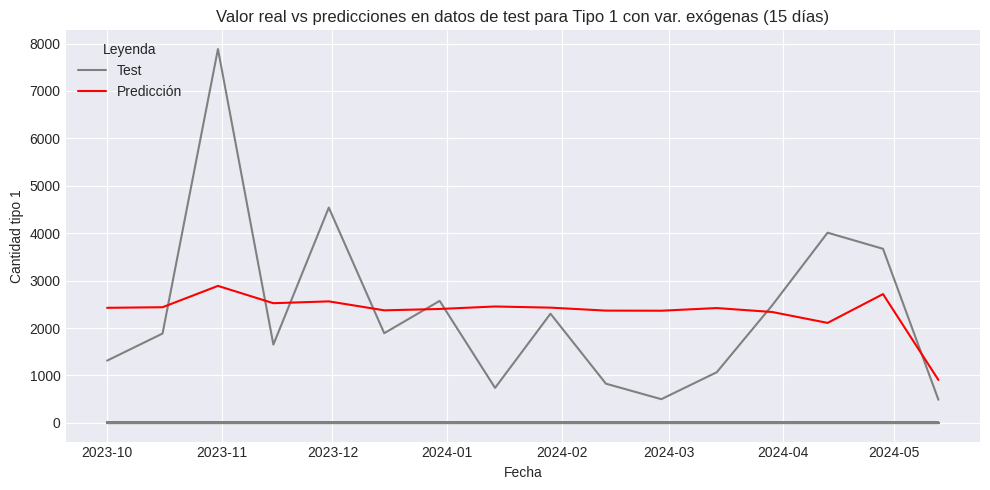

In [700]:
# Group by month and sum (if your data has daily frequency, use .resample('M').sum())
datos_test1_monthly = datos_test1.resample('15D').sum()
predicciones_monthly = predicciones.resample('15D').sum()

# Plot using matplotlib
plt.figure(figsize=(10, 5))

plt.plot(datos_test1_monthly.index, datos_test1_monthly, label='Test', color='gray')
plt.plot(predicciones_monthly.index, predicciones_monthly['pred'], label='Predicción', color='red')

plt.title('Valor real vs predicciones en datos de test para Tipo 1 con var. exógenas (15 días)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad tipo 1')
# Use only one legend entry for each line
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', title='Leyenda')
plt.tight_layout()
plt.show()

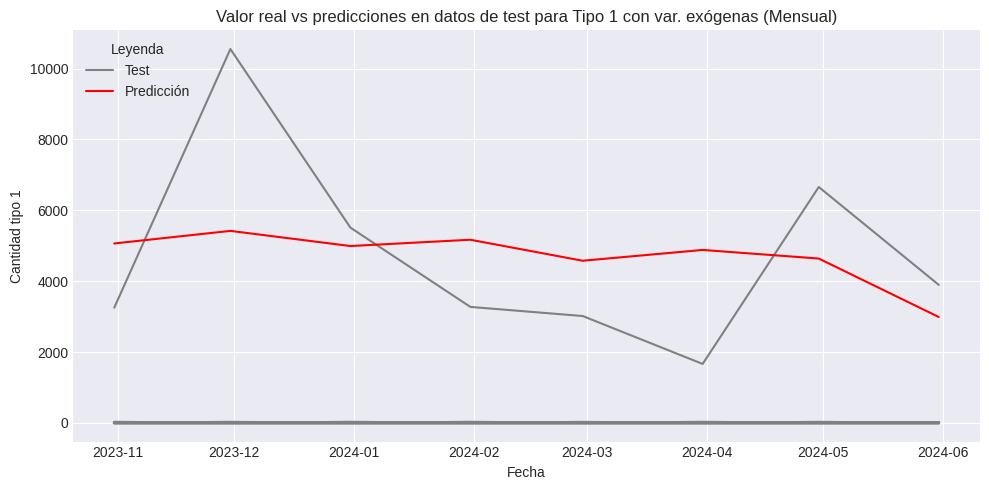

In [701]:
# Group by month and sum (if your data has daily frequency, use .resample('M').sum())
datos_test1_monthly = datos_test1.resample('M').sum()
predicciones_monthly = predicciones.resample('M').sum()

# Plot using matplotlib
plt.figure(figsize=(10, 5))

plt.plot(datos_test1_monthly.index, datos_test1_monthly, label='Test', color='gray')
plt.plot(predicciones_monthly.index, predicciones_monthly['pred'], label='Predicción', color='red')

plt.title('Valor real vs predicciones en datos de test para Tipo 1 con var. exógenas (Mensual)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad tipo 1')
# Use only one legend entry for each line
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', title='Leyenda')

plt.tight_layout()
plt.show()

## Cantidad tipo 1 debajo de X

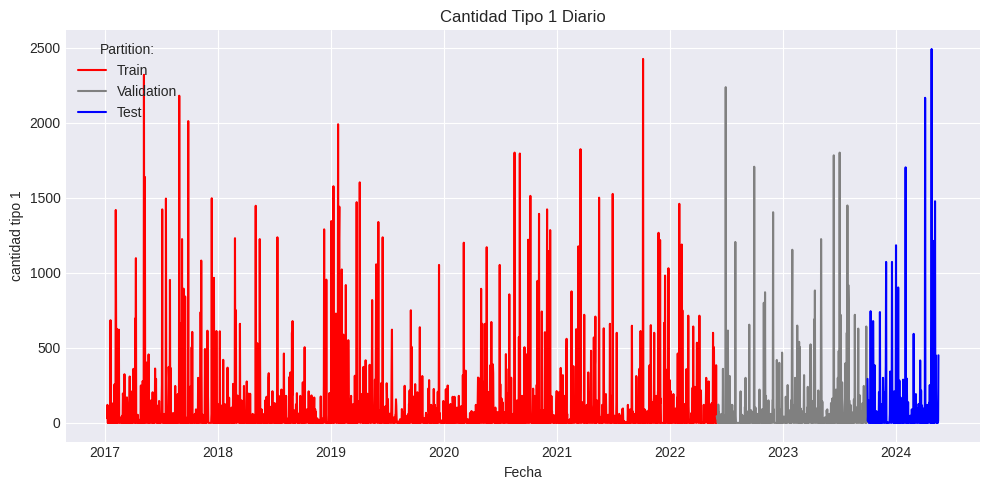

In [702]:
dftipo1alt['fecha'] = pd.to_datetime(dftipo1alt['fecha'], format='%d/%m/%y')
dftipo1alt = dftipo1alt.set_index('fecha')
dftipo1alt = dftipo1alt.asfreq('1d')
dftipo1alt = dftipo1alt.sort_index()
dftipo1alt.head(10)
dftipo1alt['cantidad tipo 1'].fillna(0, inplace=True)

datos_train1alt = dftipo1alt.loc[: fin_train, :]
datos_val1alt   = dftipo1alt.loc[fin_train:fin_validacion, :]
datos_test1alt  = dftipo1alt.loc[fin_validacion:, :]

plt.figure(figsize=(10, 5))

plt.plot(datos_train1alt.index, datos_train1alt['cantidad tipo 1'], label='Train', color="red")
plt.plot(datos_val1alt.index, datos_val1alt['cantidad tipo 1'], label='Validation',color="gray")
plt.plot(datos_test1alt.index, datos_test1alt['cantidad tipo 1'], label='Test',color="blue")

plt.title('Cantidad Tipo 1 Diario')
plt.xlabel('Fecha')
plt.ylabel('cantidad tipo 1')
plt.legend(title='Partition:', loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



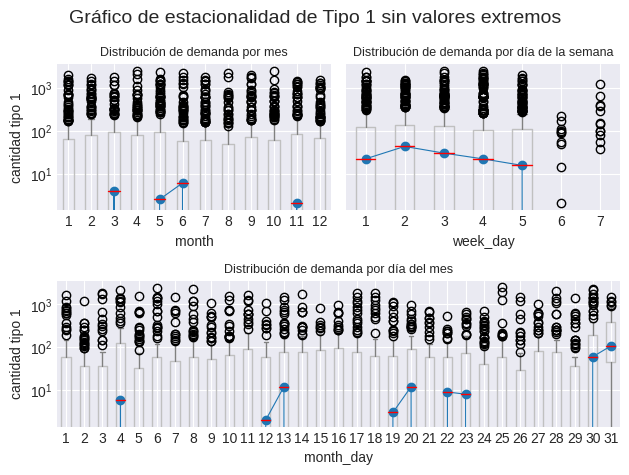

In [703]:
fig, axs = plt.subplot_mosaic(
    """
    AB
    CC
    """,
    sharey=True
)

# Users distribution by month
dftipo1alt['month'] = dftipo1alt.index.month
dftipo1alt.boxplot(column='cantidad tipo 1', by='month', ax=axs['A'], color={'boxes': 'silver', 'whiskers': 'gray', 'medians': 'red', 'caps': 'gray'})
dftipo1alt.groupby('month')['cantidad tipo 1'].median().plot(style='o-', linewidth=0.8, ax=axs['A'])
axs['A'].set_ylabel('cantidad tipo 1')
axs['A'].set_title('Distribución de demanda por mes', fontsize=9)
axs['A'].set_yscale('log')  # Set y-axis to log scale

# Users distribution by week day
dftipo1alt['week_day'] = dftipo1alt.index.day_of_week + 1
dftipo1alt.boxplot(column='cantidad tipo 1', by='week_day', ax=axs['B'],color={'boxes': 'silver', 'whiskers': 'gray', 'medians': 'red', 'caps': 'gray'})
dftipo1alt.groupby('week_day')['cantidad tipo 1'].median().plot(style='o-', linewidth=0.8, ax=axs['B'])
axs['B'].set_ylabel('cantidad tipo 1')
axs['B'].set_title('Distribución de demanda por día de la semana', fontsize=9)
axs['B'].set_yscale('log')  # Set y-axis to log scale

# Users distribution by month day
dftipo1alt['month_day'] = dftipo1alt.index.day
dftipo1alt.boxplot(column='cantidad tipo 1', by='month_day', ax=axs['C'],color={'boxes': 'silver', 'whiskers': 'gray', 'medians': 'red', 'caps': 'gray'})
dftipo1alt.groupby('month_day')['cantidad tipo 1'].median().plot(style='o-', linewidth=0.8, ax=axs['C'])
axs['C'].set_ylabel('cantidad tipo 1')
axs['C'].set_title('Distribución de demanda por día del mes', fontsize=9)
axs['C'].set_yscale('log')  # Set y-axis to log scale

fig.suptitle("Gráfico de estacionalidad de Tipo 1 sin valores extremos", fontsize=14)
fig.tight_layout()
plt.show()

In [704]:
dftipo1alt = dftipo1alt.asfreq('D')
forecaster = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(days=1),
                 n_offsets = 1
             )

# Entrenar forecaster
# ==============================================================================
forecaster.fit(y=dftipo1alt.loc[:fin_validacion, 'cantidad tipo 1'])

metrica_baseline, predicciones = backtesting_forecaster(
    forecaster         = forecaster,
    y                  = dftipo1alt['cantidad tipo 1'],
    steps              = 7,
    metric             = 'mean_squared_error',
    initial_train_size = len(dftipo1alt.loc[:fin_validacion]),
    refit              = False,
    n_jobs             = 'auto',
    verbose            = False,
    show_progress      = True
)

print(f"Backtest error (MAE): {metrica_baseline}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/33 [00:00<?, ?it/s]

Backtest error (MAE): 116535.19565217392


In [705]:
# Crear forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                 regressor     = Ridge(random_state=123),
                 lags          = 14,
                 transformer_y = StandardScaler(),
                 forecaster_id = 'cantidad tipo 1'
             )

# Hiperparámetros del regresor
param_grid = {'alpha': np.logspace(-3, 3, 10)}

# Lags utilizados como predictores
lags_grid = [7, 14, 21, [7, 14, 21]]

resultados_grid = grid_search_forecaster(
                      forecaster         = forecaster,
                      y                  = dftipo1alt.loc[:fin_validacion, 'cantidad tipo 1'],
                      param_grid         = param_grid,
                      lags_grid          = lags_grid,
                      steps              = 7,
                      metric             = 'mean_squared_error',
                      refit              = False,
                      initial_train_size = len(datos_train1alt),
                      fixed_train_size   = False,
                      return_best        = True,
                      verbose            = False
                  )

best_params = resultados_grid['params'].iat[0]

metrica, predicciones = backtesting_forecaster(
                            forecaster         = forecaster,
                            y                  = dftipo1alt['cantidad tipo 1'],
                            initial_train_size = len(dftipo1alt.loc[:fin_validacion, :]),
                            steps              = 7,
                            refit              = True,
                            fixed_train_size   = False,
                            metric             = 'mean_squared_error',
                            verbose            = True,
                            show_progress      = True
                        )
print(f'Error backtest: {metrica}')

Number of models compared: 40.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/4 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5 6 7] 
  Parameters: {'alpha': 1000.0}
  Backtesting metric: 64494.702975841145

Information of backtesting process
----------------------------------
Number of observations used for initial training: 2456
Number of observations used for backtesting: 230
    Number of folds: 33
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0
    Last fold only includes 6 observations.

Fold: 0
    Training:   2017-01-09 00:00:00 -- 2023-09-30 00:00:00  (n=2456)
    Validation: 2023-10-01 00:00:00 -- 2023-10-07 00:00:00  (n=7)
Fold: 1
    Training:   2017-01-09 00:00:00 -- 2023-10-07 00:00:00  (n=2463)
    Validation: 2023-10-08 00:00:00 -- 2023-10-14 00:00:00  (n=7)
Fold: 2
    Training:   2017-01-09 00:00:00 -- 2023-10-14 00:00:00  (n=2470)
    Validation: 2023-10-15 00:00:00 -- 2023-10-21 00:00:00  (n=7)
Fold: 3
    Training:   2

  0%|          | 0/33 [00:00<?, ?it/s]

Error backtest: 101487.17960033508


### Cantidad tipo 1 debajo de X con exogenas

In [706]:
dftipo1alt['month']     = dftipo1alt.index.month
dftipo1alt['month_day'] = dftipo1alt.index.day
dftipo1alt['week_day']  = dftipo1alt.index.day_of_week

one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse_output=False, drop='if_binary'),
        ['month', 'week_day', 'month_day'],
    ),
    remainder="passthrough",
    verbose_feature_names_out=False,
).set_output(transform="pandas")

dftipo1alt = one_hot_encoder.fit_transform(dftipo1alt)

datos_train1alt = dftipo1alt.loc[: fin_train, :]
datos_val1alt   = dftipo1alt.loc[fin_train:fin_validacion, :]
datos_test1alt  = dftipo1alt.loc[fin_validacion:, :]
exog_features = [col for col in dftipo1alt.columns if col.startswith(('month_', 'week_day_', 'month_day_'))]

forecaster = ForecasterAutoreg(
                 regressor     = Ridge(**best_params, random_state=123),
                 lags          = 14,
                 transformer_y = StandardScaler(),
                 forecaster_id = 'cantidad_tipo_1'
             )

# Backtest modelo con variables exógenas
# ==============================================================================
metrica, predicciones = backtesting_forecaster(
                            forecaster         = forecaster,
                            y                  = dftipo1alt['cantidad tipo 1'],
                            exog               = dftipo1alt[exog_features],
                            initial_train_size = len(dftipo1alt.loc[:fin_validacion, :]),
                            steps              = 7,
                            metric             = 'mean_squared_error',
                            refit              = False,
                            fixed_train_size   = False,
                            verbose            = False,
                            show_progress      = True
                        )

print(f'Error backtest: {metrica}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/33 [00:00<?, ?it/s]

Error backtest: 100003.4546386454


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



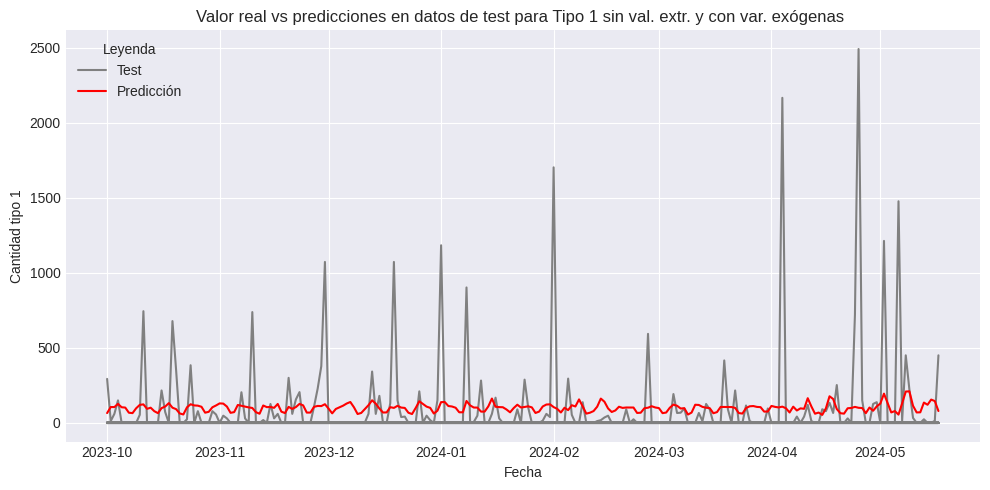

In [707]:
plt.figure(figsize=(10, 5))

plt.plot(datos_test1alt.index, datos_test1alt, label='Test', color='gray')
plt.plot(predicciones.index, predicciones['pred'], label='Predicción', color='red')

plt.title('Valor real vs predicciones en datos de test para Tipo 1 sin val. extr. y con var. exógenas ')
plt.xlabel('Fecha')
plt.ylabel('Cantidad tipo 1')
# Use only one legend entry for each line
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', title='Leyenda')

plt.tight_layout()
plt.show()

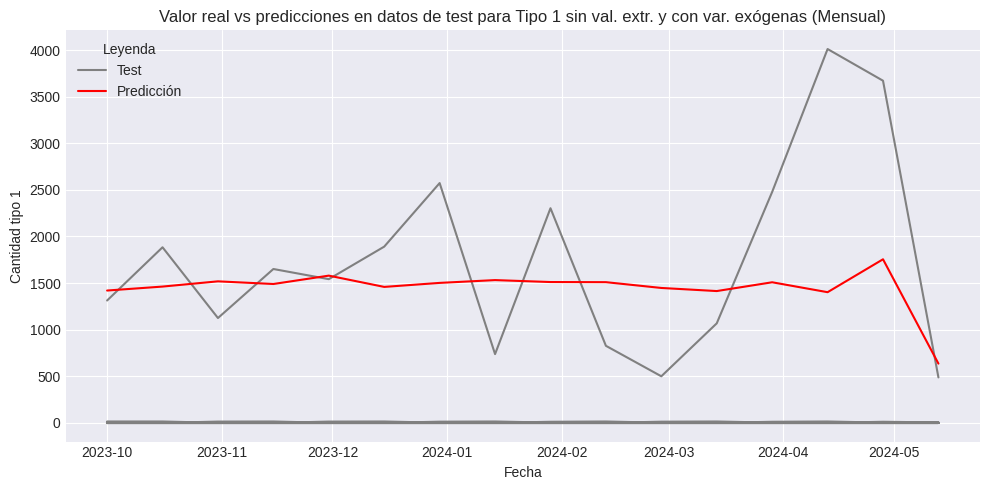

In [708]:
# Group by month and sum (if your data has daily frequency, use .resample('M').sum())
datos_test1_monthly = datos_test1alt.resample('15D').sum()
predicciones_monthly = predicciones.resample('15D').sum()

# Plot using matplotlib
plt.figure(figsize=(10, 5))

plt.plot(datos_test1_monthly.index, datos_test1_monthly, label='Test', color='gray')
plt.plot(predicciones_monthly.index, predicciones_monthly['pred'], label='Predicción', color='red')

plt.title('Valor real vs predicciones en datos de test para Tipo 1 sin val. extr. y con var. exógenas (Mensual)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad tipo 1')
# Use only one legend entry for each line
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', title='Leyenda')

plt.tight_layout()
plt.show()

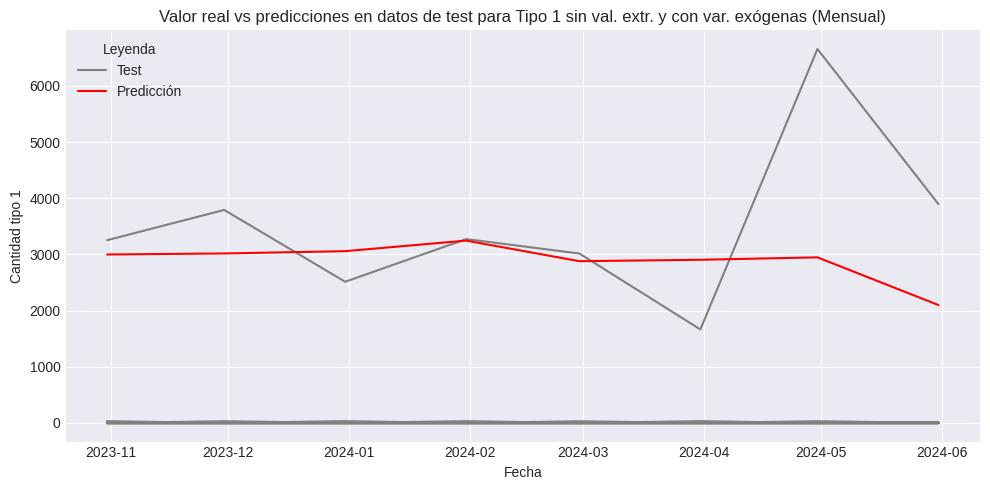

In [709]:
# Group by month and sum (if your data has daily frequency, use .resample('M').sum())
datos_test1_monthly = datos_test1alt.resample('M').sum()
predicciones_monthly = predicciones.resample('M').sum()

# Plot using matplotlib
plt.figure(figsize=(10, 5))

plt.plot(datos_test1_monthly.index, datos_test1_monthly, label='Test', color='gray')
plt.plot(predicciones_monthly.index, predicciones_monthly['pred'], label='Predicción', color='red')

plt.title('Valor real vs predicciones en datos de test para Tipo 1 sin val. extr. y con var. exógenas (Mensual)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad tipo 1')
# Use only one legend entry for each line
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', title='Leyenda')

plt.tight_layout()
plt.show()

## Cantidad tipo 2 debajo de X

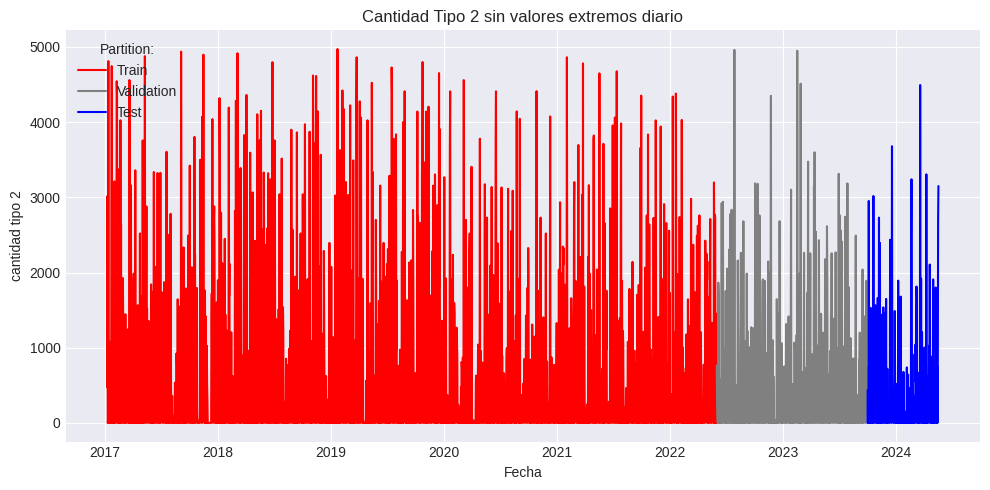

In [710]:
dftipo2alt['fecha'] = pd.to_datetime(dftipo2alt['fecha'], format='%d/%m/%y')
dftipo2alt = dftipo2alt.set_index('fecha')
dftipo2alt = dftipo2alt.asfreq('1d')
dftipo2alt = dftipo2alt.sort_index()
dftipo2alt.head(10)
dftipo2alt['cantidad tipo 2'].fillna(0, inplace=True)

datos_train2alt = dftipo2alt.loc[: fin_train, :]
datos_val2alt   = dftipo2alt.loc[fin_train:fin_validacion, :]
datos_test2alt  = dftipo2alt.loc[fin_validacion:, :]

plt.figure(figsize=(10, 5))

plt.plot(datos_train2alt.index, datos_train2alt['cantidad tipo 2'], label='Train',color="red")
plt.plot(datos_val2alt.index, datos_val2alt['cantidad tipo 2'], label='Validation',color="gray")
plt.plot(datos_test2alt.index, datos_test2alt['cantidad tipo 2'], label='Test',color="blue")

plt.title('Cantidad Tipo 2 sin valores extremos diario')
plt.xlabel('Fecha')
plt.ylabel('cantidad tipo 2')
plt.legend(title='Partition:', loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



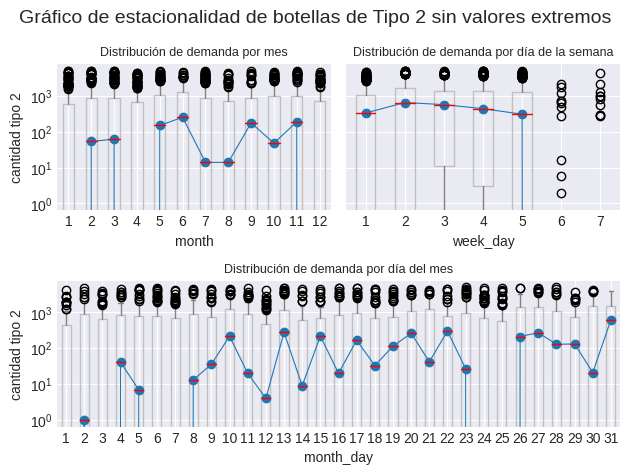

In [711]:
fig, axs = plt.subplot_mosaic(
    """
    AB
    CC
    """,
    sharey=True
)

# Users distribution by month
dftipo2alt['month'] = dftipo2alt.index.month
dftipo2alt.boxplot(column='cantidad tipo 2', by='month', ax=axs['A'], color={'boxes': 'silver', 'whiskers': 'gray', 'medians': 'red', 'caps': 'gray'})
dftipo2alt.groupby('month')['cantidad tipo 2'].median().plot(style='o-', linewidth=0.8, ax=axs['A'])
axs['A'].set_ylabel('cantidad tipo 2')
axs['A'].set_title('Distribución de demanda por mes', fontsize=9)
axs['A'].set_yscale('log')  # Set y-axis to log scale

# Users distribution by week day
dftipo2alt['week_day'] = dftipo2alt.index.day_of_week + 1
dftipo2alt.boxplot(column='cantidad tipo 2', by='week_day', ax=axs['B'], color={'boxes': 'silver', 'whiskers': 'gray', 'medians': 'red', 'caps': 'gray'})
dftipo2alt.groupby('week_day')['cantidad tipo 2'].median().plot(style='o-', linewidth=0.8, ax=axs['B'])
axs['B'].set_ylabel('cantidad tipo 2')
axs['B'].set_title('Distribución de demanda por día de la semana', fontsize=9)
axs['B'].set_yscale('log')  # Set y-axis to log scale

# Users distribution by month day
dftipo2alt['month_day'] = dftipo2alt.index.day
dftipo2alt.boxplot(column='cantidad tipo 2', by='month_day', ax=axs['C'], color={'boxes': 'silver', 'whiskers': 'gray', 'medians': 'red', 'caps': 'gray'})
dftipo2alt.groupby('month_day')['cantidad tipo 2'].median().plot(style='o-', linewidth=0.8, ax=axs['C'])
axs['C'].set_ylabel('cantidad tipo 2')
axs['C'].set_title('Distribución de demanda por día del mes', fontsize=9)
axs['C'].set_yscale('log')  # Set y-axis to log scale

fig.suptitle("Gráfico de estacionalidad de botellas de Tipo 2 sin valores extremos", fontsize=14)
fig.tight_layout()
plt.show()

In [712]:
dftipo2alt = dftipo2alt.asfreq('D')
forecaster = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(days=1),
                 n_offsets = 1
             )

# Entrenar forecaster
# ==============================================================================
forecaster.fit(y=dftipo2alt.loc[:fin_validacion, 'cantidad tipo 2'])

metrica_baseline, predicciones = backtesting_forecaster(
    forecaster         = forecaster,
    y                  = dftipo2alt['cantidad tipo 2'],
    steps              = 7,
    metric             = 'mean_squared_error',
    initial_train_size = len(dftipo2alt.loc[:fin_validacion]),
    refit              = False,
    n_jobs             = 'auto',
    verbose            = False,
    show_progress      = True
)

print(f"Backtest error (MAE): {metrica_baseline}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/33 [00:00<?, ?it/s]

Backtest error (MAE): 842933.804347826


In [713]:
# Crear forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                 regressor     = Ridge(random_state=123),
                 lags          = 14,
                 transformer_y = StandardScaler(),
                 forecaster_id = 'cantidad tipo 2'
             )

# Hiperparámetros del regresor
param_grid = {'alpha': np.logspace(-3, 3, 10)}

# Lags utilizados como predictores
lags_grid = [7, 14, 21, [7, 14, 21]]

resultados_grid = grid_search_forecaster(
                      forecaster         = forecaster,
                      y                  = dftipo2alt.loc[:fin_validacion, 'cantidad tipo 2'],
                      param_grid         = param_grid,
                      lags_grid          = lags_grid,
                      steps              = 7,
                      metric             = 'mean_squared_error',
                      refit              = False,
                      initial_train_size = len(datos_train2alt),
                      fixed_train_size   = False,
                      return_best        = True,
                      verbose            = False
                  )

best_params = resultados_grid['params'].iat[0]

metrica, predicciones = backtesting_forecaster(
                            forecaster         = forecaster,
                            y                  = dftipo2alt['cantidad tipo 2'],
                            initial_train_size = len(dftipo2alt.loc[:fin_validacion, :]),
                            steps              = 7,
                            refit              = True,
                            fixed_train_size   = False,
                            metric             = 'mean_squared_error',
                            verbose            = True,
                            show_progress      = True
                        )
print(f'Error backtest: {metrica}')

Number of models compared: 40.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lags grid:   0%|          | 0/4 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 7 14 21] 
  Parameters: {'alpha': 0.001}
  Backtesting metric: 730525.0417714507

Information of backtesting process
----------------------------------
Number of observations used for initial training: 2456
Number of observations used for backtesting: 230
    Number of folds: 33
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0
    Last fold only includes 6 observations.

Fold: 0
    Training:   2017-01-09 00:00:00 -- 2023-09-30 00:00:00  (n=2456)
    Validation: 2023-10-01 00:00:00 -- 2023-10-07 00:00:00  (n=7)
Fold: 1
    Training:   2017-01-09 00:00:00 -- 2023-10-07 00:00:00  (n=2463)
    Validation: 2023-10-08 00:00:00 -- 2023-10-14 00:00:00  (n=7)
Fold: 2
    Training:   2017-01-09 00:00:00 -- 2023-10-14 00:00:00  (n=2470)
    Validation: 2023-10-15 00:00:00 -- 2023-10-21 00:00:00  (n=7)
Fold: 3
    Training:   2017-01-

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.



  0%|          | 0/33 [00:00<?, ?it/s]

Error backtest: 637354.241717834


### Cantidad Tipo 2 debajo de X con Exogenas

In [714]:
dftipo2alt['month']     = dftipo2alt.index.month
dftipo2alt['month_day'] = dftipo2alt.index.day
dftipo2alt['week_day']  = dftipo2alt.index.day_of_week

one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse_output=False, drop='if_binary'),
        ['month', 'week_day', 'month_day'],
    ),
    remainder="passthrough",
    verbose_feature_names_out=False,
).set_output(transform="pandas")

dftipo2alt = one_hot_encoder.fit_transform(dftipo2alt)

datos_train1alt = dftipo2alt.loc[: fin_train, :]
datos_val1alt   = dftipo2alt.loc[fin_train:fin_validacion, :]
datos_test1alt  = dftipo2alt.loc[fin_validacion:, :]
exog_features = [col for col in dftipo2alt.columns if col.startswith(('month_', 'week_day_', 'month_day_'))]

forecaster = ForecasterAutoreg(
                 regressor     = Ridge(**best_params, random_state=123),
                 lags          = 14,
                 transformer_y = StandardScaler(),
                 forecaster_id = 'cantidad_tipo_1'
             )

# Backtest modelo con variables exógenas
# ==============================================================================
metrica, predicciones = backtesting_forecaster(
                            forecaster         = forecaster,
                            y                  = dftipo2alt['cantidad tipo 2'],
                            exog               = dftipo2alt[exog_features],
                            initial_train_size = len(dftipo2alt.loc[:fin_validacion, :]),
                            steps              = 7,
                            metric             = 'mean_squared_error',
                            refit              = False,
                            fixed_train_size   = False,
                            verbose            = False,
                            show_progress      = True
                        )

print(f'Error backtest: {metrica}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  0%|          | 0/33 [00:00<?, ?it/s]

Error backtest: 611823.1550858464


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



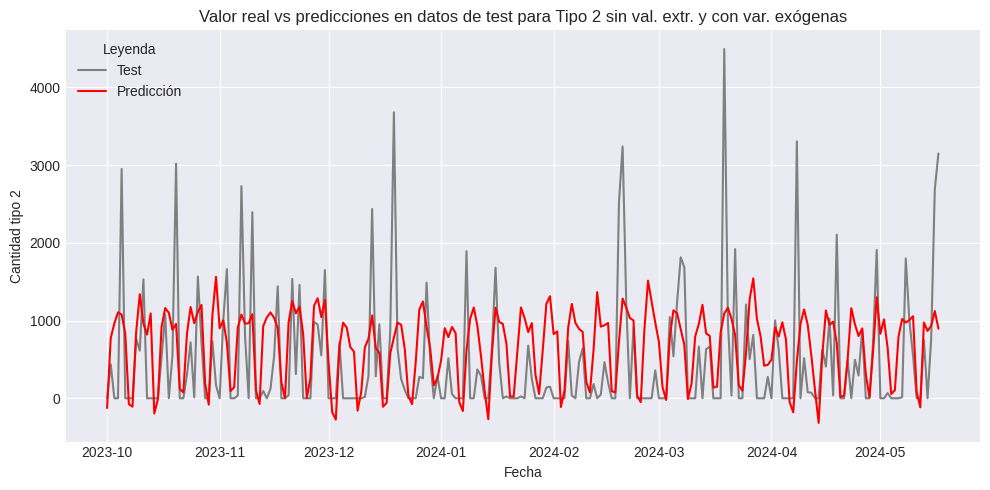

In [715]:
plt.figure(figsize=(10, 5))

plt.plot(datos_test2alt.index, datos_test2alt, label='Test', color='gray')
plt.plot(predicciones.index, predicciones['pred'], label='Predicción', color='red')

plt.title('Valor real vs predicciones en datos de test para Tipo 2 sin val. extr. y con var. exógenas')
plt.xlabel('Fecha')
plt.ylabel('Cantidad tipo 2')
# Use only one legend entry for each line
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', title='Leyenda')

plt.tight_layout()
plt.show()

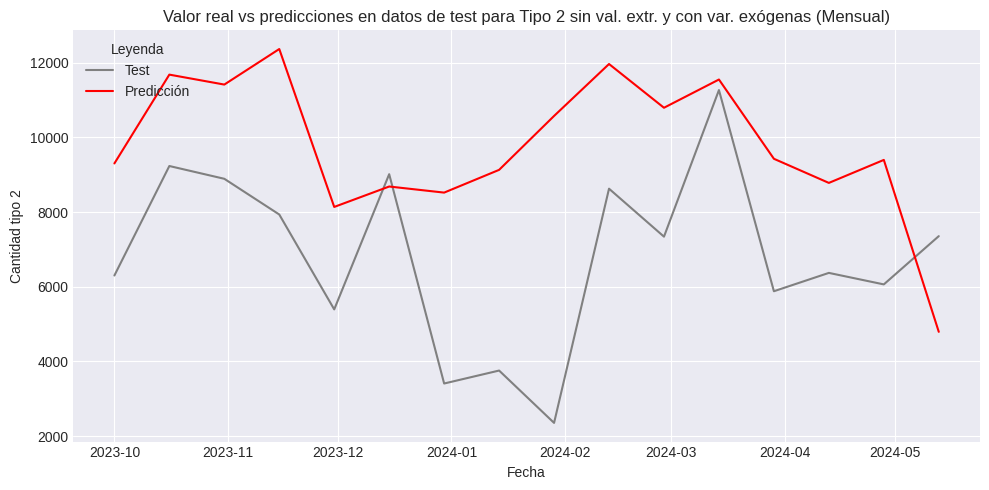

In [716]:
# Group by month and sum (if your data has daily frequency, use .resample('M').sum())
datos_test2_monthly = datos_test2alt.resample('15D').sum()
predicciones_monthly = predicciones.resample('15D').sum()

# Plot using matplotlib
plt.figure(figsize=(10, 5))

plt.plot(datos_test2_monthly.index, datos_test2_monthly, label='Test', color='gray')
plt.plot(predicciones_monthly.index, predicciones_monthly['pred'], label='Predicción', color='red')

plt.title('Valor real vs predicciones en datos de test para Tipo 2 sin val. extr. y con var. exógenas (Mensual)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad tipo 2')
# Use only one legend entry for each line
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', title='Leyenda')

plt.tight_layout()
plt.show()

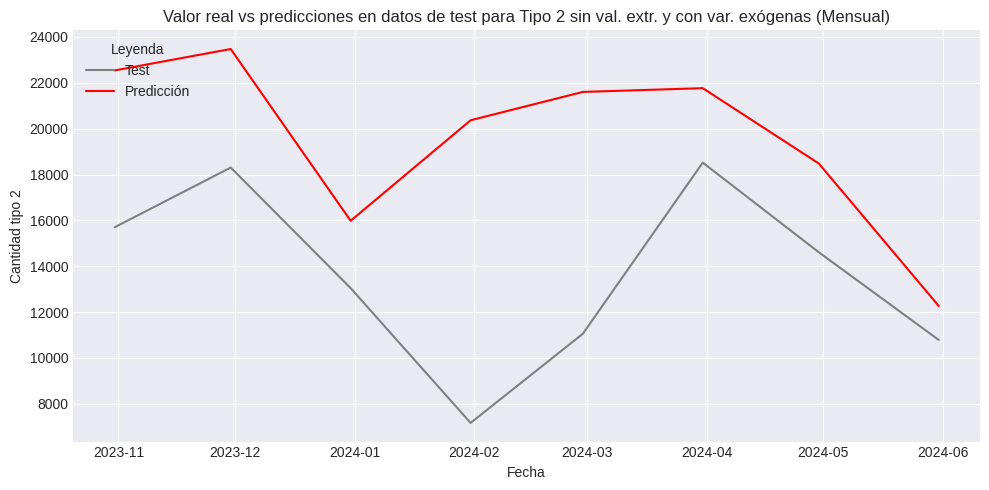

In [717]:
# Group by month and sum (if your data has daily frequency, use .resample('M').sum())
datos_test2_monthly = datos_test2alt.resample('M').sum()
predicciones_monthly = predicciones.resample('M').sum()

# Plot using matplotlib
plt.figure(figsize=(10, 5))

plt.plot(datos_test1_monthly.index, datos_test2_monthly, label='Test', color='gray')
plt.plot(predicciones_monthly.index, predicciones_monthly['pred'], label='Predicción', color='red')

plt.title('Valor real vs predicciones en datos de test para Tipo 2 sin val. extr. y con var. exógenas (Mensual)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad tipo 2')
# Use only one legend entry for each line
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', title='Leyenda')

plt.tight_layout()
plt.show()